In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# open the csv file
import pandas as pd

# Try reading the CSV with a different encoding
df = pd.read_csv("/content/Statcan-FT-canadian-dbloading.csv", encoding='utf-8')


In [27]:
df

REF_DATE                              GEO           DGUID  \
0     2011/2012                           Canada  2021A000011124   
1     2012/2013                           Canada  2021A000011124   
2     2013/2014                           Canada  2021A000011124   
3     2014/2015                           Canada  2021A000011124   
4     2015/2016                           Canada  2021A000011124   
...         ...                              ...             ...   
2743  2017/2018  Nunavut Arctic College, Nunavut             NaN   
2744  2018/2019  Nunavut Arctic College, Nunavut             NaN   
2745  2019/2020  Nunavut Arctic College, Nunavut             NaN   
2746  2020/2021  Nunavut Arctic College, Nunavut             NaN   
2747  2021/2022  Nunavut Arctic College, Nunavut             NaN   

             Field of study         Program type         Credential type  \
0     Total, field of study  Total, program type  Total, credential type   
1     Total, field of study  Total, program type  Total, credential type   
2     Total, field of study  Total, program type  Total, credential type   
3     Total, field of study  Total, program type  Total, credential type   
4     Total, field of study  Total, program type  Total, credential type   
...                     ...                  ...                     ...   
2743  Total, field of study  Total, program type  Total, credential type   
2744  Total, field of study  Total, program type  Total, credential type   
2745  Total, field of study  Total, program type  Total, credential type   
2746  Total, field of study  Total, program type  Total, credential type   
2747  Total, field of study  Total, program type  Total, credential type   

              Institution type Registration status  \
0     Total, institution type    Full-time student   
1     Total, institution type    Full-time student   
2     Total, institution type    Full-time student   
3     Total, institution type    Full-time student   
4     Total, institution type    Full-time student   
...                        ...                 ...   
2743  Total, institution type    Full-time student   
2744  Total, institution type    Full-time student   
2745  Total, institution type    Full-time student   
2746  Total, institution type    Full-time student   
2747  Total, institution type    Full-time student   

     Status of student in Canada         Gender  ... UOM_ID  SCALAR_FACTOR  \
0              Canadian students  Total, gender  ...    223          units   
1              Canadian students  Total, gender  ...    223          units   
2              Canadian students  Total, gender  ...    223          units   
3              Canadian students  Total, gender  ...    223          units   
4              Canadian students  Total, gender  ...    223          units   
...                          ...            ...  ...    ...            ...   
2743           Canadian students  Total, gender  ...    223          units   
2744           Canadian students  Total, gender  ...    223          units   
2745           Canadian students  Total, gender  ...    223          units   
2746           Canadian students  Total, gender  ...    223          units   
2747           Canadian students  Total, gender  ...    223          units   

     SCALAR_ID       VECTOR         COORDINATE      VALUE  STATUS SYMBOL  \
0            0  v1438513037    1.1.1.1.1.2.2.1  1353324.0     NaN    NaN   
1            0  v1438513037    1.1.1.1.1.2.2.1  1366443.0     NaN    NaN   
2            0  v1438513037    1.1.1.1.1.2.2.1  1378959.0     NaN    NaN   
3            0  v1438513037    1.1.1.1.1.2.2.1  1366716.0     NaN    NaN   
4            0  v1438513037    1.1.1.1.1.2.2.1  1355496.0     NaN    NaN   
...        ...          ...                ...        ...     ...    ...   
2743         0  v1445971302  258.1.1.1.1.2.2.1      495.0     NaN    NaN   
2744         0  v1445971302  258.1.1.1.1.2.2.1      693.0     NaN    NaN   
2745   

## Lots of trash columns we can remove

In [28]:
print(df.columns)

Index(['REF_DATE', 'GEO', 'DGUID', 'Field of study', 'Program type',
       'Credential type', 'Institution type', 'Registration status',
       'Status of student in Canada', 'Gender', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')


In [29]:
df.drop(['DGUID', 'Field of study', 'Program type', 'Credential type', 'Institution type', 'Gender', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS' ], axis=1, inplace=True)

Cleaned off most columns, keeping Full-time Canadian to show the student type being investigated

In [30]:
# rename columns
df.rename(columns={"REF_DATE": "FY Start","GEO": "School/Locality", "Status of student in Canada": "Status", "VALUE": "Enrolment"}, inplace=True)

In [6]:
df

FY Start                  School/Locality Registration status  \
0     2011/2012                           Canada   Full-time student   
1     2012/2013                           Canada   Full-time student   
2     2013/2014                           Canada   Full-time student   
3     2014/2015                           Canada   Full-time student   
4     2015/2016                           Canada   Full-time student   
...         ...                              ...                 ...   
2743  2017/2018  Nunavut Arctic College, Nunavut   Full-time student   
2744  2018/2019  Nunavut Arctic College, Nunavut   Full-time student   
2745  2019/2020  Nunavut Arctic College, Nunavut   Full-time student   
2746  2020/2021  Nunavut Arctic College, Nunavut   Full-time student   
2747  2021/2022  Nunavut Arctic College, Nunavut   Full-time student   

                 Status  Enrolment  
0     Canadian students  1353324.0  
1     Canadian students  1366443.0  
2     Canadian students  1378959.0  
3     Canadian students  1366716.0  
4     Canadian students  1355496.0  
...                 ...        ...  
2743  Canadian students      495.0  
2744  Canadian students      693.0  
2745  Canadian students      750.0  
2746  Canadian students      843.0  
2747  Canadian students      873.0  

[2748 rows x 5 columns]

In [31]:
df["FY Start"] = df["FY Start"].apply(lambda x: int(x[:4]))

In [18]:
df

FY Start                  School/Locality Registration status  \
0         2011                           Canada   Full-time student   
1         2012                           Canada   Full-time student   
2         2013                           Canada   Full-time student   
3         2014                           Canada   Full-time student   
4         2015                           Canada   Full-time student   
...        ...                              ...                 ...   
2743      2017  Nunavut Arctic College, Nunavut   Full-time student   
2744      2018  Nunavut Arctic College, Nunavut   Full-time student   
2745      2019  Nunavut Arctic College, Nunavut   Full-time student   
2746      2020  Nunavut Arctic College, Nunavut   Full-time student   
2747      2021  Nunavut Arctic College, Nunavut   Full-time student   

                 Status  Enrolment  
0     Canadian students  1353324.0  
1     Canadian students  1366443.0  
2     Canadian students  1378959.0  
3     Canadian students  1366716.0  
4     Canadian students  1355496.0  
...                 ...        ...  
2743  Canadian students      495.0  
2744  Canadian students      693.0  
2745  Canadian students      750.0  
2746  Canadian students      843.0  
2747  Canadian students      873.0  

[2748 rows x 5 columns]

### Split up the colleges/universities from Canada and the provincial totals

In [32]:
# List of provinces and territories in Canada
canadian_provinces_territories = [
    "Alberta", "British Columbia", "Manitoba", "New Brunswick", "Newfoundland and Labrador",
    "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec", "Saskatchewan",
    "Northwest Territories", "Nunavut", "Yukon", "Canada"
]

# Convert the list to a set for fast exact matching
province_set = set(canadian_provinces_territories)

# Create a mask for exact matches with Canada or any province/territory
exact_match_mask = df['School/Locality'].isin(province_set)

# Create the Canada & Provinces DataFrame (exact matches)
canada_df = df[exact_match_mask]

# For rows that do not match exactly, extract the college/university name before the last comma
# We will create a mask where School/Locality does not match any province or Canada
non_canada_df = df[~exact_match_mask]

# Correctly extract the institution name (everything before the last comma)
# Ensure you use rsplit correctly, specifying the delimiter (comma) and maxsplit=1
non_canada_df['Institution Name'] = non_canada_df['School/Locality'].str.rsplit(',', n=1).str[0]

# Now, `canada_df` contains rows where School/Locality is exactly a province or territory, and
# `non_canada_df` contains rows with college/university names (before the last comma)
# If you want to merge both DataFrames back into a single one:
colleges_universities_df = non_canada_df.drop(columns=['Institution Name'])

# Display the results
print(f"Number of rows in canada_df: {len(canada_df)}")
print(f"Number of rows in colleges_universities_df: {len(colleges_universities_df)}")

# Optionally, save the DataFrames to CSVs
# canada_df.to_csv('canada_provinces.csv', index=False)
# colleges_universities_df.to_csv('colleges_universities.csv', index=False)



Number of rows in canada_df: 154
Number of rows in colleges_universities_df: 2594


<ipython-input-32-1495b58d6068>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_canada_df['Institution Name'] = non_canada_df['School/Locality'].str.rsplit(',', n=1).str[0]


In [34]:
colleges_universities_df

FY Start                                    School/Locality  \
22        2011  Memorial University of Newfoundland, Newfoundl...   
23        2012  Memorial University of Newfoundland, Newfoundl...   
24        2013  Memorial University of Newfoundland, Newfoundl...   
25        2014  Memorial University of Newfoundland, Newfoundl...   
26        2015  Memorial University of Newfoundland, Newfoundl...   
...        ...                                                ...   
2743      2017                    Nunavut Arctic College, Nunavut   
2744      2018                    Nunavut Arctic College, Nunavut   
2745      2019                    Nunavut Arctic College, Nunavut   
2746      2020                    Nunavut Arctic College, Nunavut   
2747      2021                    Nunavut Arctic College, Nunavut   

     Registration status             Status  Enrolment  
22     Full-time student  Canadian students    14097.0  
23     Full-time student  Canadian students    13923.0  
24     Full-time student  Canadian students    13611.0  
25     Full-time student  Canadian students    12996.0  
26     Full-time student  Canadian students    12795.0  
...                  ...                ...        ...  
2743   Full-time student  Canadian students      495.0  
2744   Full-time student  Canadian students      693.0  
2745   Full-time student  Canadian students      750.0  
2746   Full-time student  Canadian students      843.0  
2747   Full-time student  Canadian students      873.0  

[2594 rows x 5 columns]

In [37]:
canada_df['School/Locality'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut'], dtype=object)

### Below: Showing Canadian student enrolment over the last ten years by province

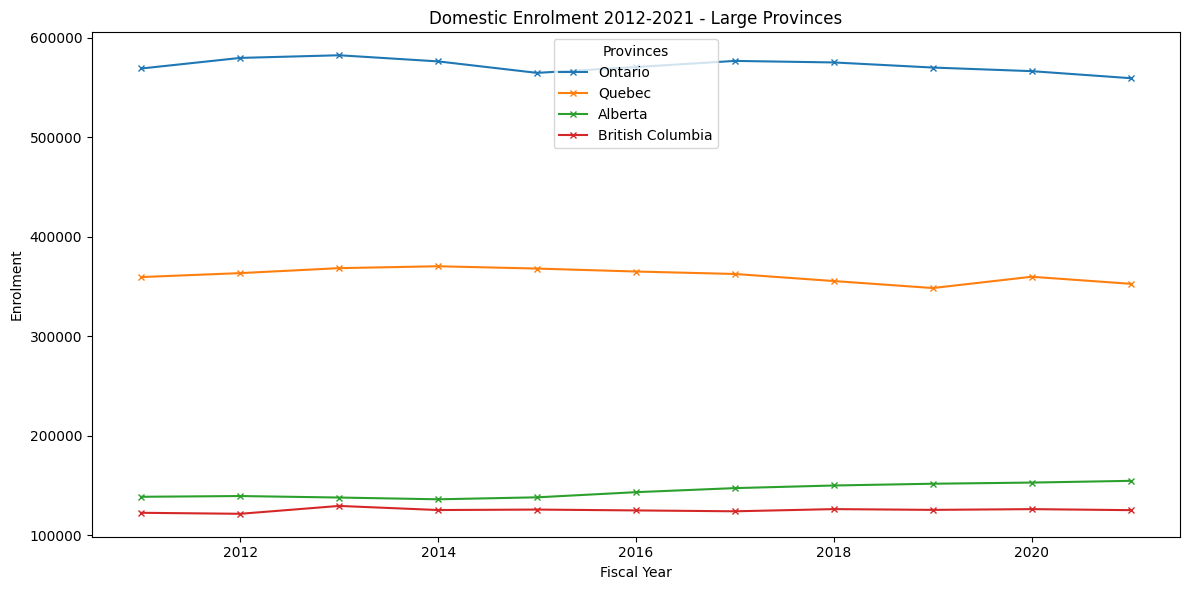

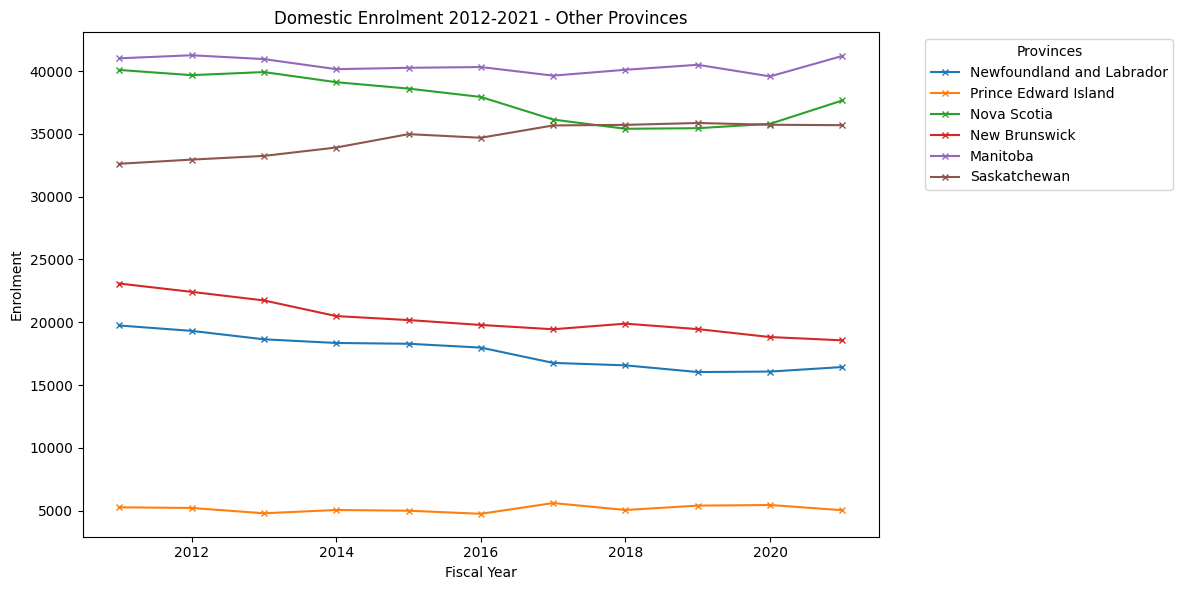

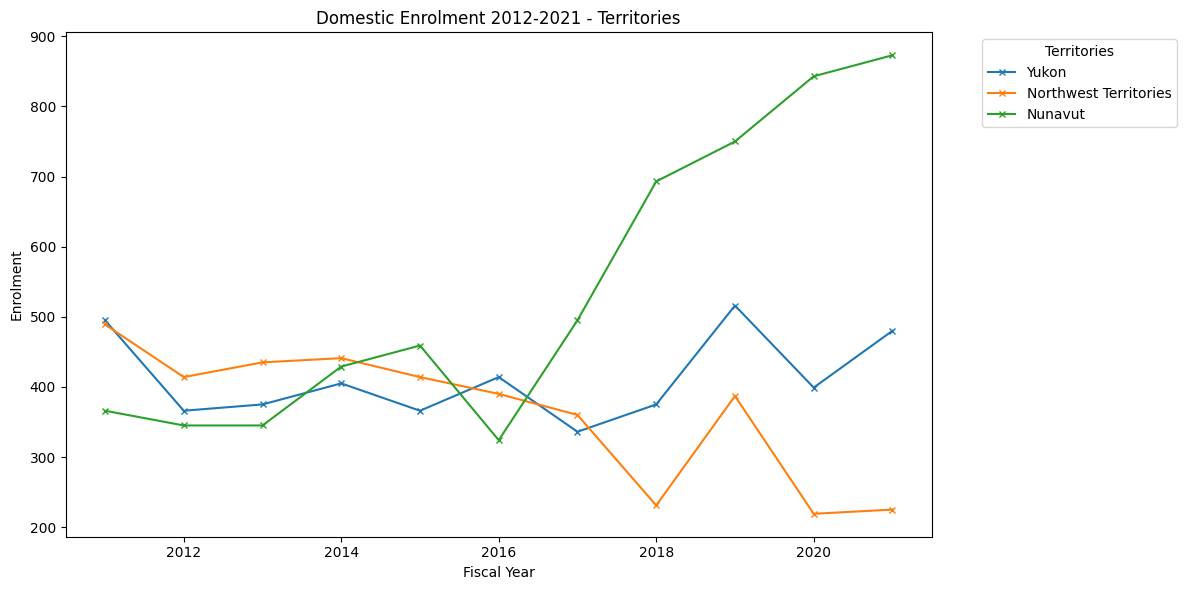

In [40]:
import matplotlib.pyplot as plt

# Filter out rows where 'School/Locality' is "Canada"
provinces_df = canada_df[~canada_df['School/Locality'].isin(["Canada"])]

# Define the provinces and territories for the three separate graphs
large_population_provinces = ["Ontario", "Quebec", "Alberta", "British Columbia"]
territories = ["Yukon", "Northwest Territories", "Nunavut"]
other_provinces = [
    province for province in provinces_df['School/Locality'].unique()
    if province not in large_population_provinces and province not in territories
]

# Create the first graph for large population provinces
plt.figure(figsize=(12, 6))
for province in large_population_provinces:
    province_data = provinces_df[provinces_df['School/Locality'] == province]
    plt.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
plt.title('Domestic Enrolment 2012-2021 - Large Provinces')
plt.xlabel('Fiscal Year')
plt.ylabel('Enrolment')
plt.legend(title='Provinces')
plt.tight_layout()
plt.show()

# Create the second graph for other provinces
plt.figure(figsize=(12, 6))
for province in other_provinces:
    province_data = provinces_df[provinces_df['School/Locality'] == province]
    plt.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
plt.title('Domestic Enrolment 2012-2021 - Other Provinces')
plt.xlabel('Fiscal Year')
plt.ylabel('Enrolment')
plt.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the third graph for territories
plt.figure(figsize=(12, 6))
for territory in territories:
    territory_data = provinces_df[provinces_df['School/Locality'] == territory]
    plt.plot(
        territory_data['FY Start'],
        territory_data['Enrolment'],
        label=territory,
        marker='x',
        markersize=4
    )
plt.title('Domestic Enrolment 2012-2021 - Territories')
plt.xlabel('Fiscal Year')
plt.ylabel('Enrolment')
plt.legend(title='Territories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [41]:
colleges_universities_df

FY Start                                    School/Locality  \
22        2011  Memorial University of Newfoundland, Newfoundl...   
23        2012  Memorial University of Newfoundland, Newfoundl...   
24        2013  Memorial University of Newfoundland, Newfoundl...   
25        2014  Memorial University of Newfoundland, Newfoundl...   
26        2015  Memorial University of Newfoundland, Newfoundl...   
...        ...                                                ...   
2743      2017                    Nunavut Arctic College, Nunavut   
2744      2018                    Nunavut Arctic College, Nunavut   
2745      2019                    Nunavut Arctic College, Nunavut   
2746      2020                    Nunavut Arctic College, Nunavut   
2747      2021                    Nunavut Arctic College, Nunavut   

     Registration status             Status  Enrolment  
22     Full-time student  Canadian students    14097.0  
23     Full-time student  Canadian students    13923.0  
24     Full-time student  Canadian students    13611.0  
25     Full-time student  Canadian students    12996.0  
26     Full-time student  Canadian students    12795.0  
...                  ...                ...        ...  
2743   Full-time student  Canadian students      495.0  
2744   Full-time student  Canadian students      693.0  
2745   Full-time student  Canadian students      750.0  
2746   Full-time student  Canadian students      843.0  
2747   Full-time student  Canadian students      873.0  

[2594 rows x 5 columns]

In [42]:
# Split 'School/Locality' by ", " from the right and extract school name and province/territory
colleges_universities_df[['School Name', 'Province/Territory']] = colleges_universities_df['School/Locality'].str.rsplit(", ", n=1, expand=True)

# Drop the original 'School/Locality' column if no longer needed
colleges_universities_df.drop(columns=['School/Locality'], inplace=True)

# Display the updated dataframe
print(colleges_universities_df.head())


    FY Start Registration status             Status  Enrolment  \
22      2011   Full-time student  Canadian students    14097.0   
23      2012   Full-time student  Canadian students    13923.0   
24      2013   Full-time student  Canadian students    13611.0   
25      2014   Full-time student  Canadian students    12996.0   
26      2015   Full-time student  Canadian students    12795.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador  


In [43]:
colleges_universities_df

FY Start Registration status             Status  Enrolment  \
22        2011   Full-time student  Canadian students    14097.0   
23        2012   Full-time student  Canadian students    13923.0   
24        2013   Full-time student  Canadian students    13611.0   
25        2014   Full-time student  Canadian students    12996.0   
26        2015   Full-time student  Canadian students    12795.0   
...        ...                 ...                ...        ...   
2743      2017   Full-time student  Canadian students      495.0   
2744      2018   Full-time student  Canadian students      693.0   
2745      2019   Full-time student  Canadian students      750.0   
2746      2020   Full-time student  Canadian students      843.0   
2747      2021   Full-time student  Canadian students      873.0   

                              School Name         Province/Territory  
22    Memorial University of Newfoundland  Newfoundland and Labrador  
23    Memorial University of Newfoundland  Newfoundland and Labrador  
24    Memorial University of Newfoundland  Newfoundland and Labrador  
25    Memorial University of Newfoundland  Newfoundland and Labrador  
26    Memorial University of Newfoundland  Newfoundland and Labrador  
...                                   ...                        ...  
2743               Nunavut Arctic College                    Nunavut  
2744               Nunavut Arctic College                    Nunavut  
2745               Nunavut Arctic College                    Nunavut  
2746               Nunavut Arctic College                    Nunavut  
2747               Nunavut Arctic College                    Nunavut  

[2594 rows x 6 columns]

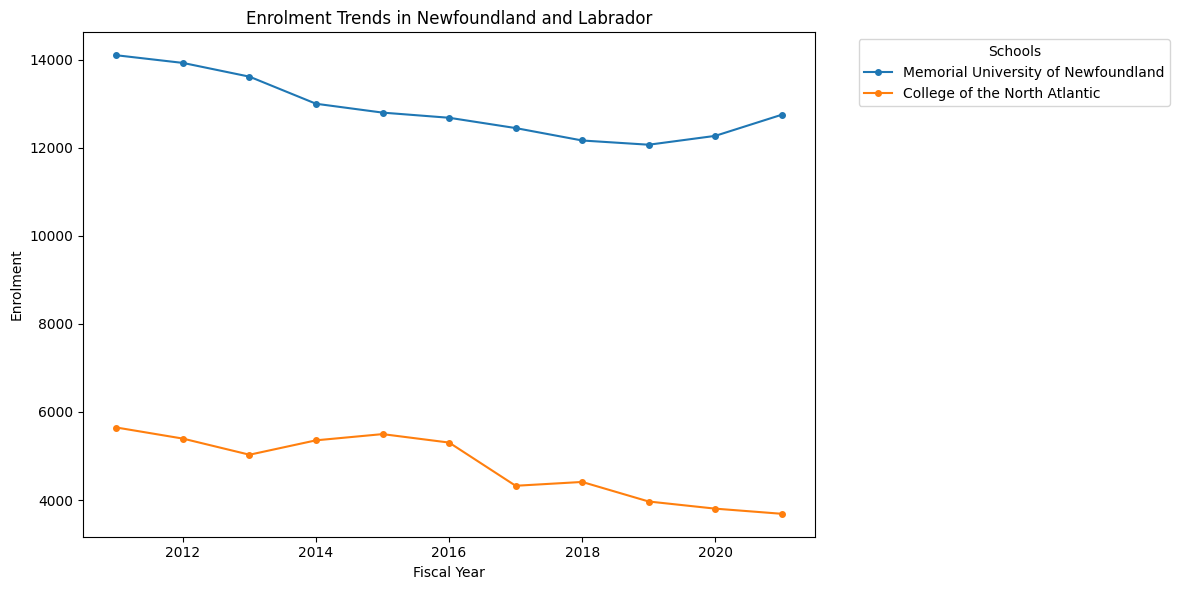

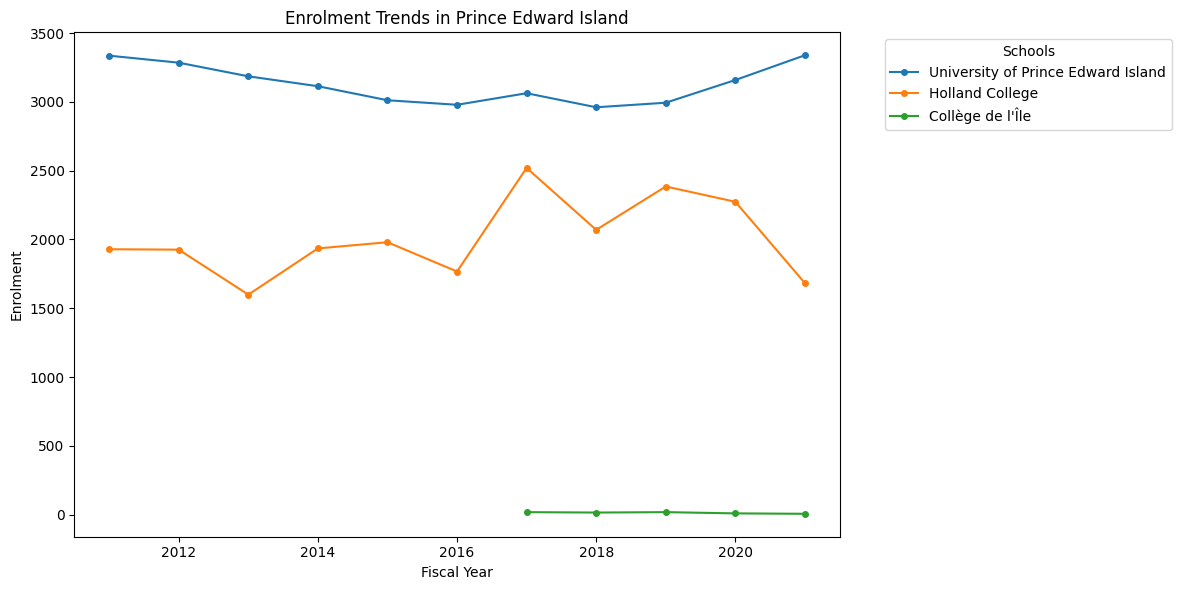

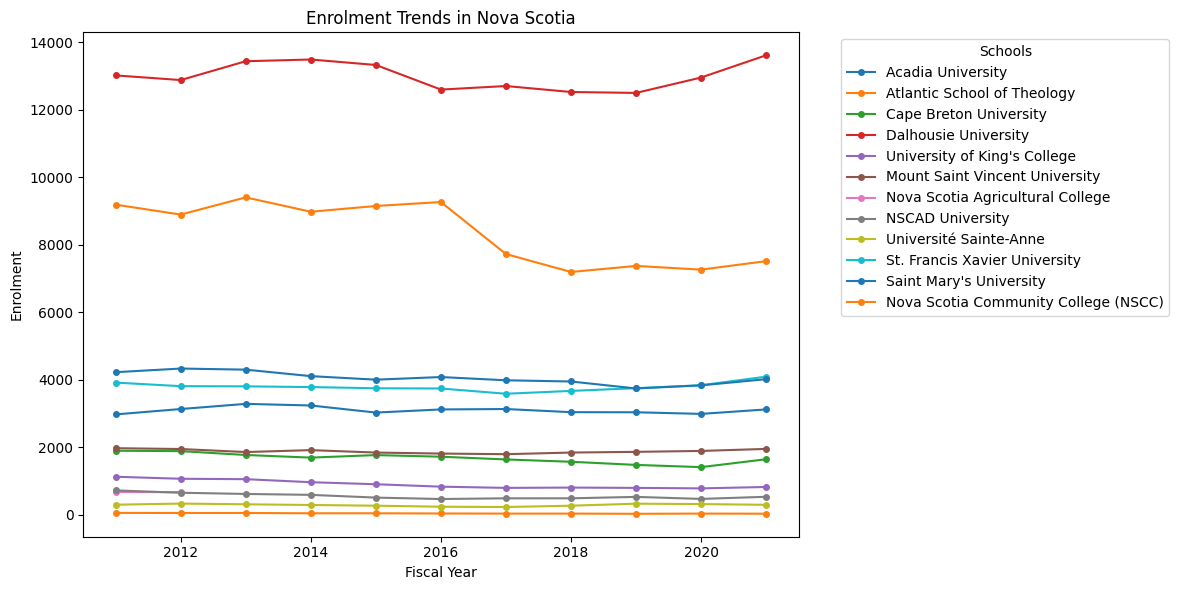

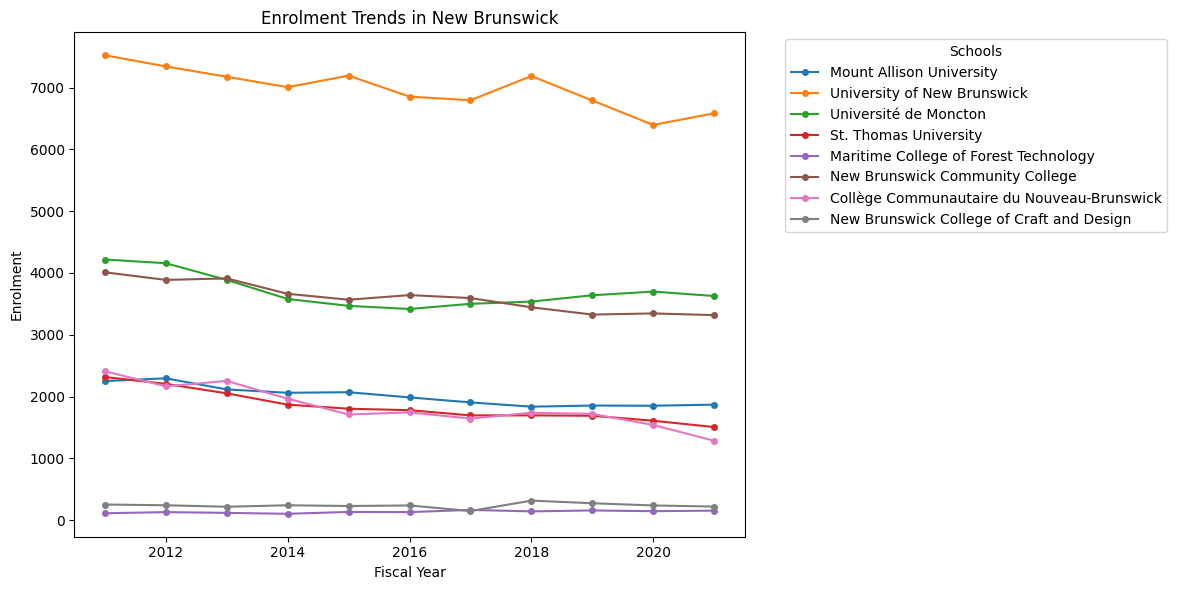

<ipython-input-44-e03cc573d8ee>:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


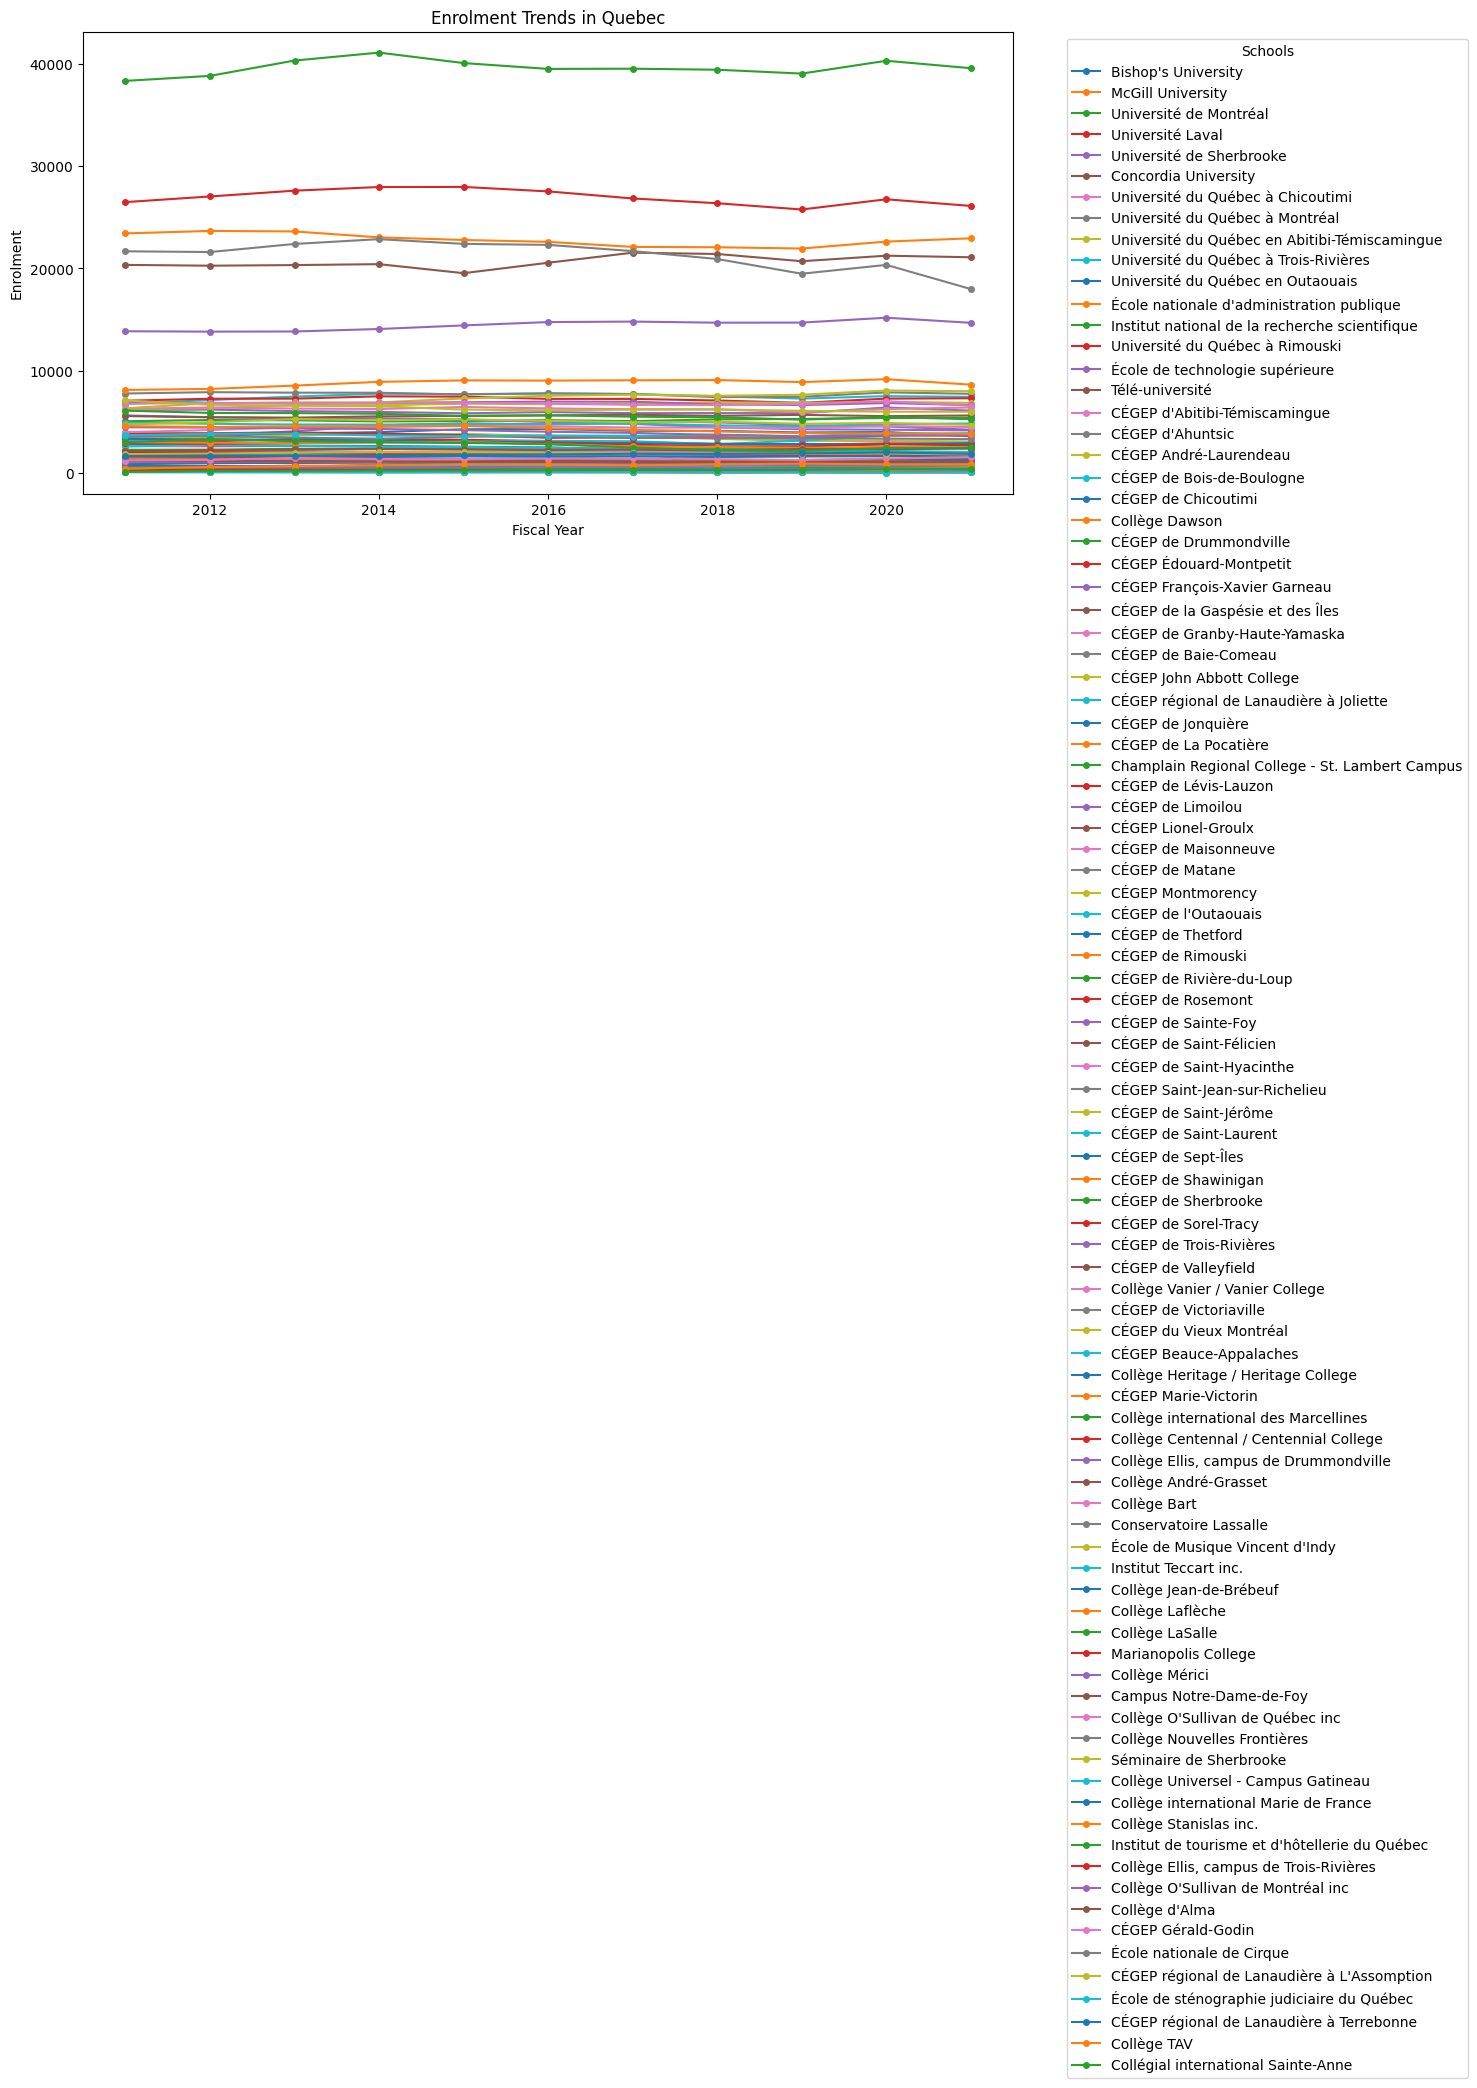

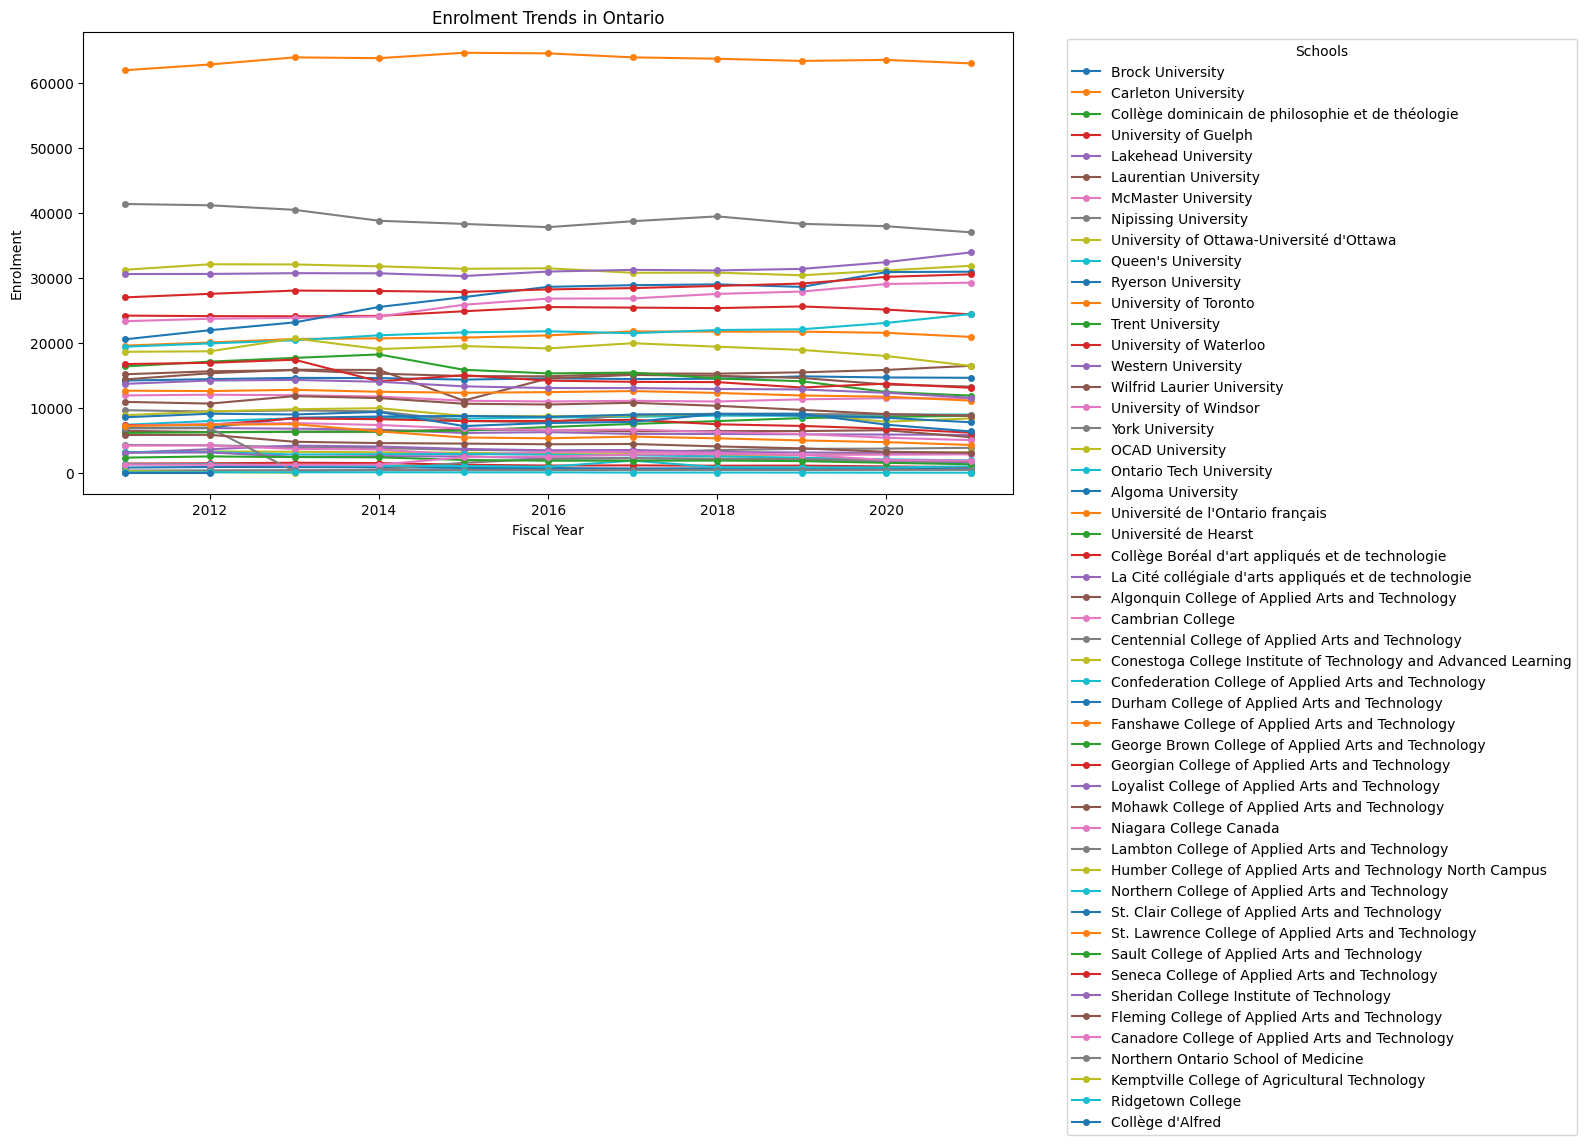

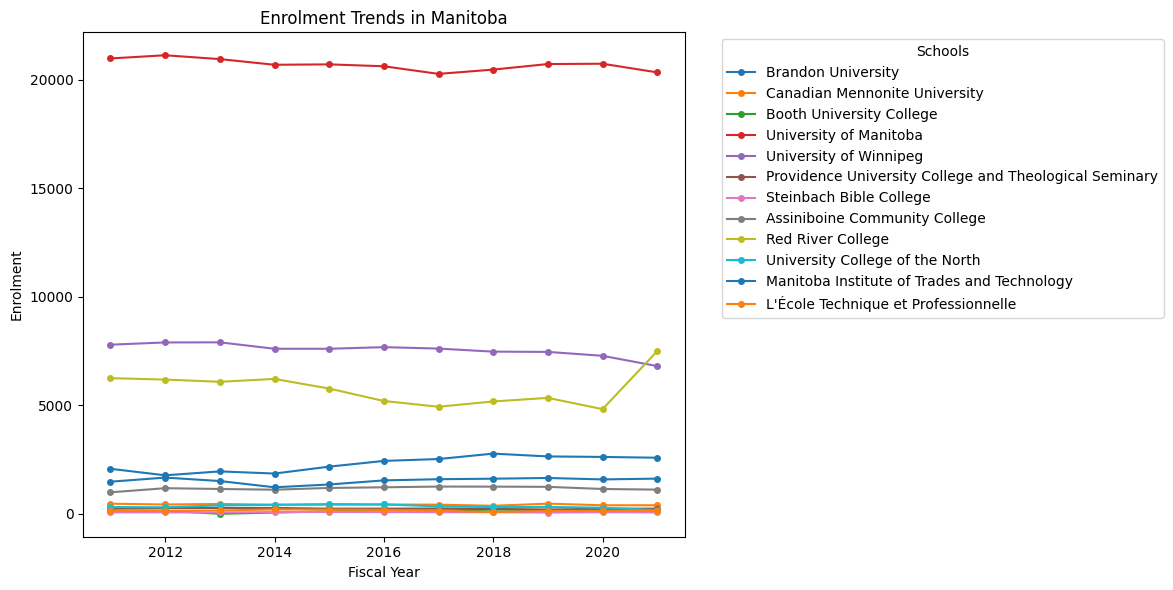

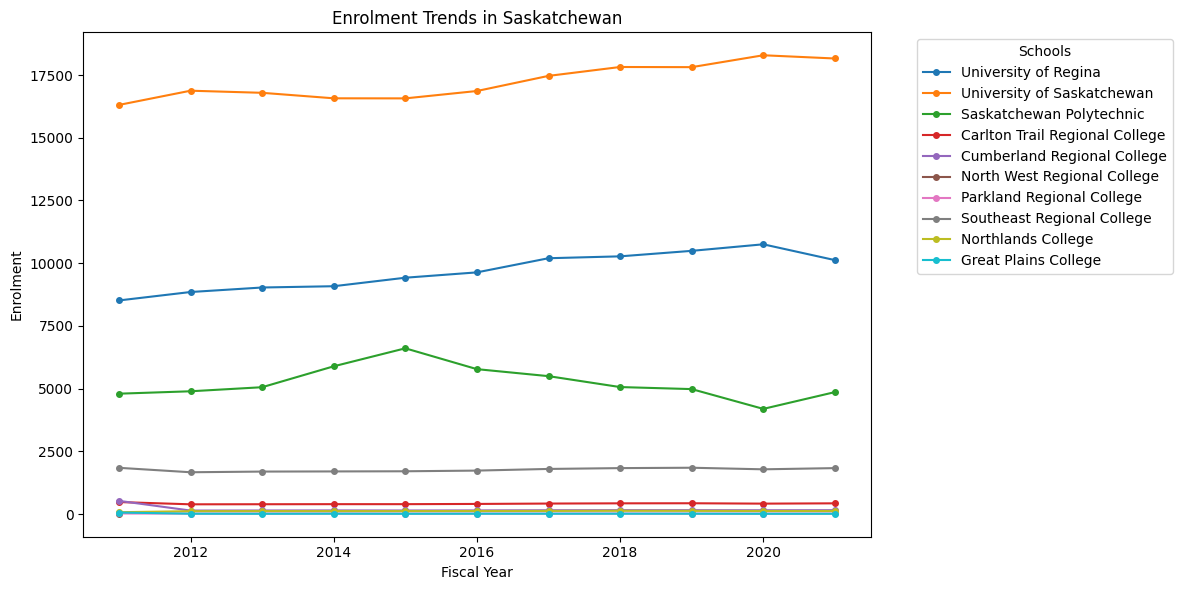

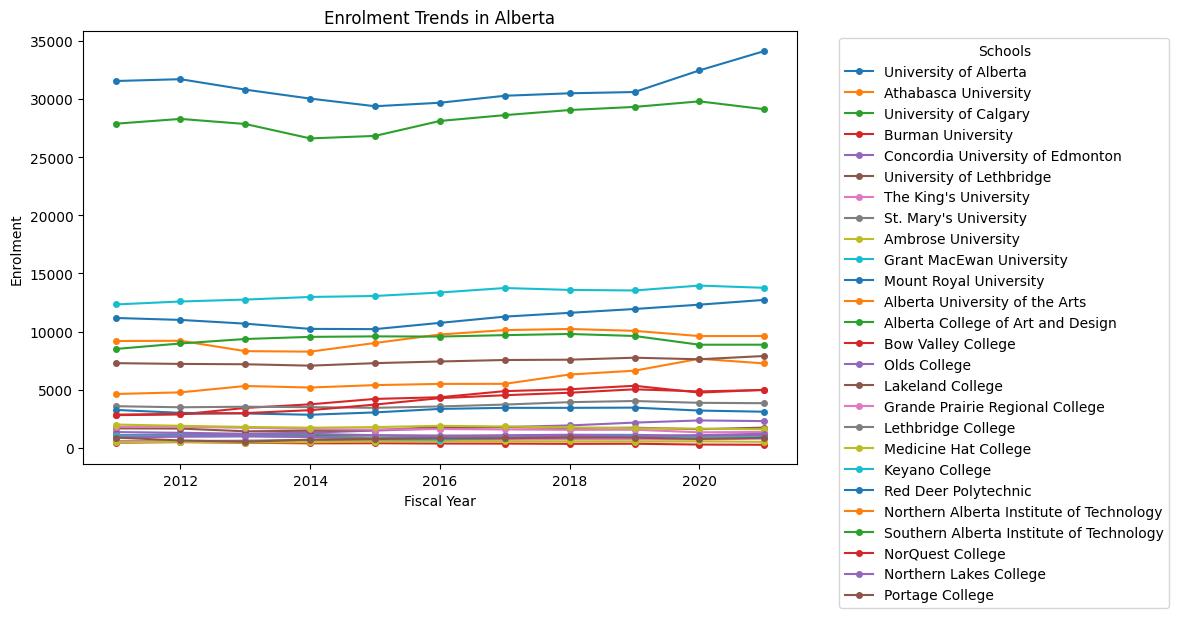

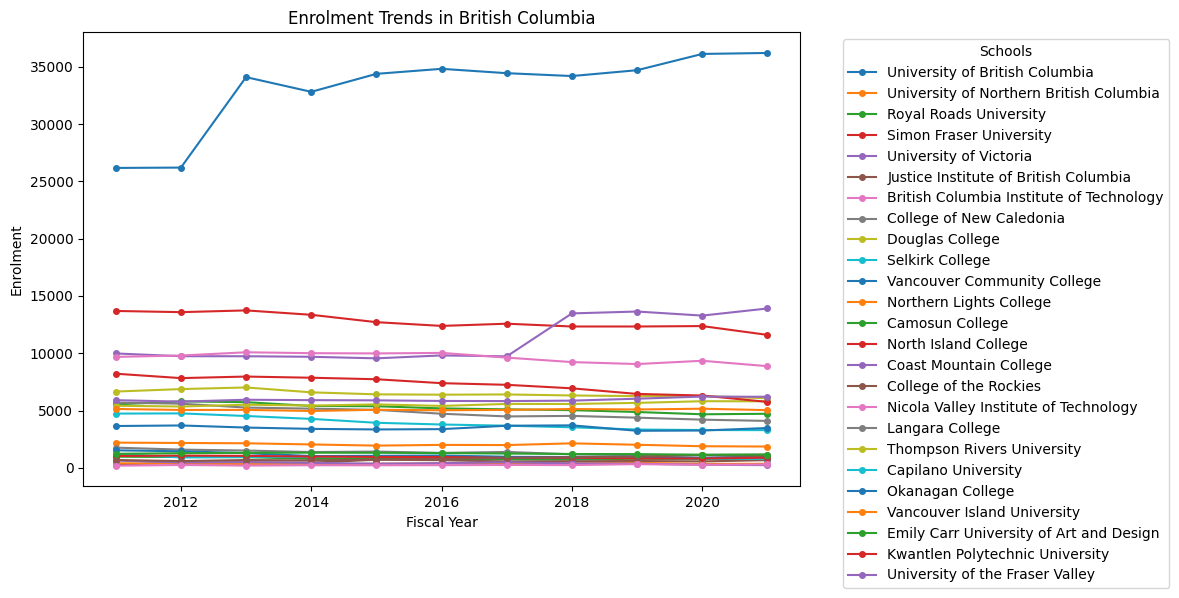

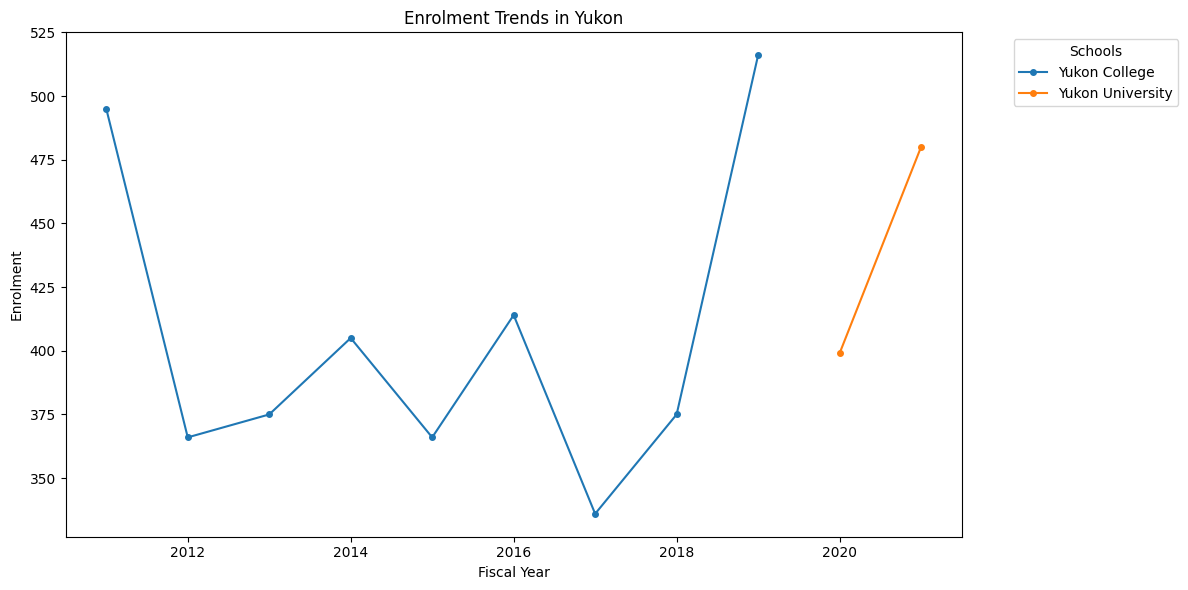

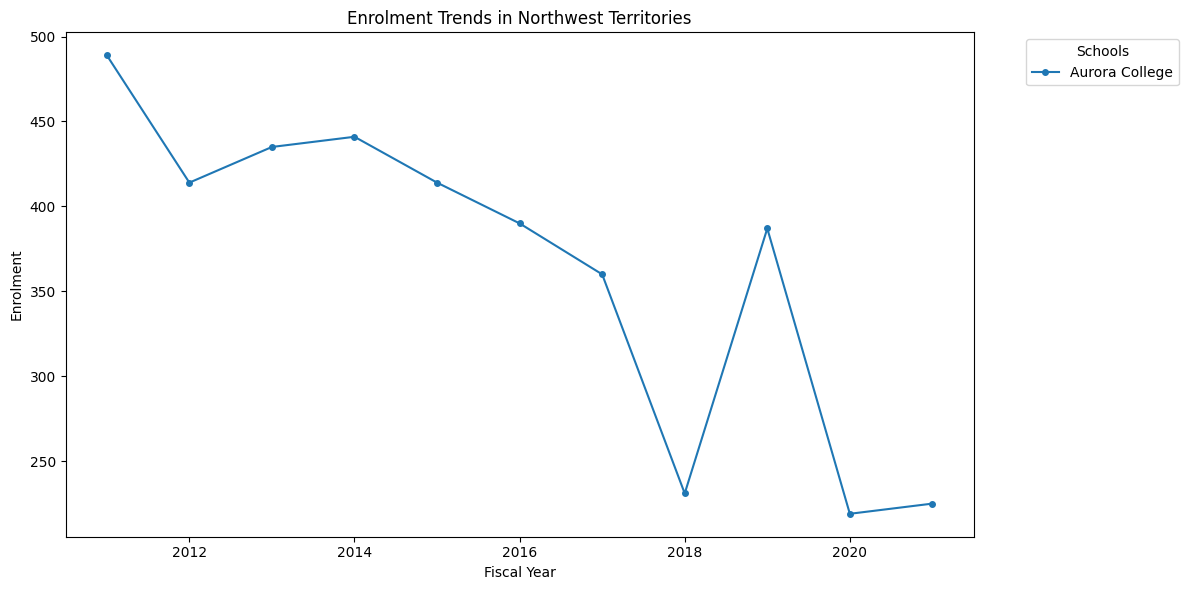

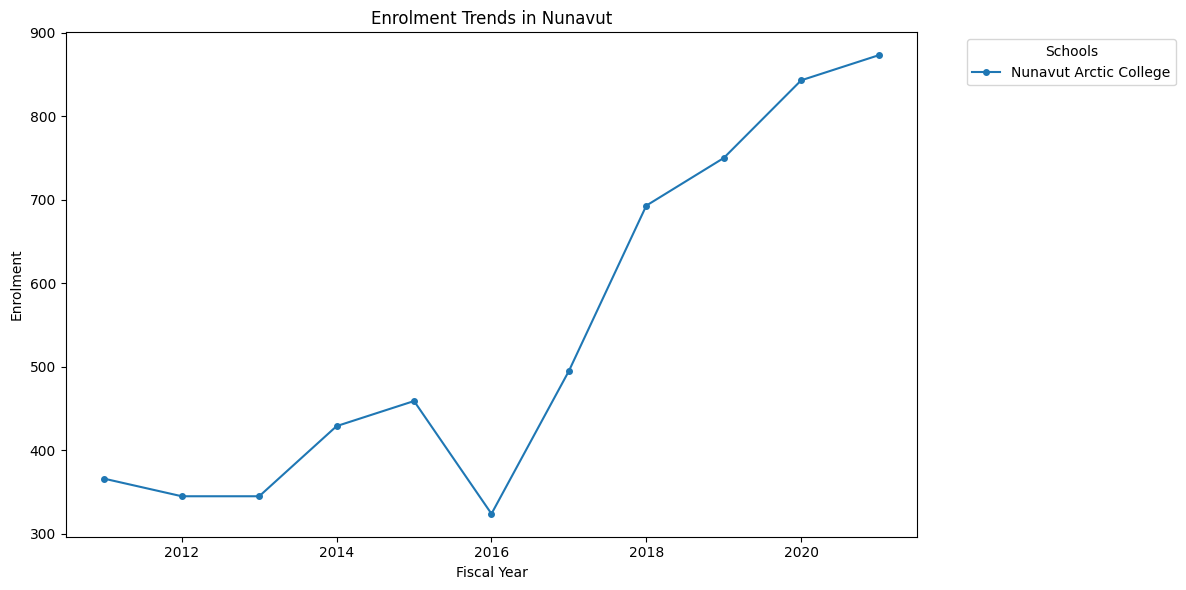

In [44]:
import matplotlib.pyplot as plt

# Get the unique provinces/territories from the dataframe
unique_provinces_territories = colleges_universities_df['Province/Territory'].unique()

# Iterate over each province/territory to create separate graphs
for province in unique_provinces_territories:
    # Filter the data for the current province/territory
    province_data = colleges_universities_df[colleges_universities_df['Province/Territory'] == province]

    # Create a new figure for the province
    plt.figure(figsize=(12, 6))

    # Plot enrolment trends for each school in the current province/territory
    for school in province_data['School Name'].unique():
        school_data = province_data[province_data['School Name'] == school]
        plt.plot(
            school_data['FY Start'],
            school_data['Enrolment'],
            label=school,
            marker='x',
            markersize=4
        )

    # Set the title and labels
    plt.title(f'Domestic Enrolment in {province}')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Enrolment')

    # Display legend and layout
    plt.legend(title='Schools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Below: International Students from Statcan info 2012-2021

In [46]:
# open the csv file
import pandas as pd

# Try reading the CSV with a different encoding
df_intl = pd.read_csv("/content/statcan-intl-enrolment.csv", encoding='utf-8')

In [47]:
df_intl

REF_DATE                                    GEO           DGUID  \
0     2011/2012                                 Canada  2021A000011124   
1     2012/2013                                 Canada  2021A000011124   
2     2013/2014                                 Canada  2021A000011124   
3     2014/2015                                 Canada  2021A000011124   
4     2015/2016                                 Canada  2021A000011124   
...         ...                                    ...             ...   
2565  2016/2017                  Northwest Territories     2021A000161   
2566  2011/2012  Aurora College, Northwest Territories             NaN   
2567  2016/2017  Aurora College, Northwest Territories             NaN   
2568  2014/2015                                Nunavut     2021A000162   
2569  2014/2015        Nunavut Arctic College, Nunavut             NaN   

             Field of study         Program type         Credential type  \
0     Total, field of study  Total, program type  Total, credential type   
1     Total, field of study  Total, program type  Total, credential type   
2     Total, field of study  Total, program type  Total, credential type   
3     Total, field of study  Total, program type  Total, credential type   
4     Total, field of study  Total, program type  Total, credential type   
...                     ...                  ...                     ...   
2565  Total, field of study  Total, program type  Total, credential type   
2566  Total, field of study  Total, program type  Total, credential type   
2567  Total, field of study  Total, program type  Total, credential type   
2568  Total, field of study  Total, program type  Total, credential type   
2569  Total, field of study  Total, program type  Total, credential type   

              Institution type Registration status  \
0     Total, institution type    Full-time student   
1     Total, institution type    Full-time student   
2     Total, institution type    Full-time student   
3     Total, institution type    Full-time student   
4     Total, institution type    Full-time student   
...                        ...                 ...   
2565  Total, institution type    Full-time student   
2566  Total, institution type    Full-time student   
2567  Total, institution type    Full-time student   
2568  Total, institution type    Full-time student   
2569  Total, institution type    Full-time student   

     Status of student in Canada         Gender  ... UOM_ID  SCALAR_FACTOR  \
0         International students  Total, gender  ...    223          units   
1         International students  Total, gender  ...    223          units   
2         International students  Total, gender  ...    223          units   
3         International students  Total, gender  ...    223          units   
4         International students  Total, gender  ...    223          units   
...                          ...            ...  ...    ...            ...   
2565      International students  Total, gender  ...    223          units   
2566      International students  Total, gender  ...    223          units   
2567      International students  Total, gender  ...    223          units   
2568      International students  Total, gender  ...    223          units   
2569      International students  Total, gender  ...    223          units   

     SCALAR_ID       VECTOR         COORDINATE     VALUE  STATUS SYMBOL  \
0            0  v1438513041    1.1.1.1.1.2.3.1  127467.0     NaN    NaN   
1            0  v1438513041    1.1.1.1.1.2.3.1  141675.0     NaN    NaN   
2            0  v1438513041    1.1.1.1.1.2.3.1  160038.0     NaN    NaN   
3            0  v1438513041    1.1.1.1.1.2.3.1  181086.0     NaN    NaN   
4            0  v1438513041    1.1.1.1.1.2.3.1  195063.0     NaN    NaN   
...        ...          ...                ...       ...     ...    ...   
2565         0  v1445944097  255.1.1.1.1.2.3.1       0.0     NaN    NaN   
2566         0  v14

In [49]:
df_intl.drop(['DGUID', 'Field of study', 'Program type', 'Credential type', 'Institution type', 'Gender', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS' ], axis=1, inplace=True)

In [51]:
# rename columns
df_intl.rename(columns={"REF_DATE": "FY Start","GEO": "School/Locality", "Status of student in Canada": "Status", "VALUE": "Enrolment"}, inplace=True)

In [52]:
df_intl

FY Start                        School/Locality Registration status  \
0     2011/2012                                 Canada   Full-time student   
1     2012/2013                                 Canada   Full-time student   
2     2013/2014                                 Canada   Full-time student   
3     2014/2015                                 Canada   Full-time student   
4     2015/2016                                 Canada   Full-time student   
...         ...                                    ...                 ...   
2565  2016/2017                  Northwest Territories   Full-time student   
2566  2011/2012  Aurora College, Northwest Territories   Full-time student   
2567  2016/2017  Aurora College, Northwest Territories   Full-time student   
2568  2014/2015                                Nunavut   Full-time student   
2569  2014/2015        Nunavut Arctic College, Nunavut   Full-time student   

                      Status  Enrolment  
0     International students   127467.0  
1     International students   141675.0  
2     International students   160038.0  
3     International students   181086.0  
4     International students   195063.0  
...                      ...        ...  
2565  International students        0.0  
2566  International students        3.0  
2567  International students        0.0  
2568  International students        3.0  
2569  International students        3.0  

[2570 rows x 5 columns]

In [54]:
df_intl["FY Start"] = df_intl["FY Start"].apply(lambda x: int(x[:4]))

In [55]:
df_intl

FY Start                        School/Locality Registration status  \
0         2011                                 Canada   Full-time student   
1         2012                                 Canada   Full-time student   
2         2013                                 Canada   Full-time student   
3         2014                                 Canada   Full-time student   
4         2015                                 Canada   Full-time student   
...        ...                                    ...                 ...   
2565      2016                  Northwest Territories   Full-time student   
2566      2011  Aurora College, Northwest Territories   Full-time student   
2567      2016  Aurora College, Northwest Territories   Full-time student   
2568      2014                                Nunavut   Full-time student   
2569      2014        Nunavut Arctic College, Nunavut   Full-time student   

                      Status  Enrolment  
0     International students   127467.0  
1     International students   141675.0  
2     International students   160038.0  
3     International students   181086.0  
4     International students   195063.0  
...                      ...        ...  
2565  International students        0.0  
2566  International students        3.0  
2567  International students        0.0  
2568  International students        3.0  
2569  International students        3.0  

[2570 rows x 5 columns]

In [57]:
# same as above to split provinces and territories with variables set above

# Create a mask for exact matches with Canada or any province/territory
exact_match_mask = df_intl['School/Locality'].isin(province_set)

# Create the Canada & Provinces DataFrame (exact matches)
canada_df_intl = df_intl[exact_match_mask]

# For rows that do not match exactly, extract the college/university name before the last comma
# We will create a mask where School/Locality does not match any province or Canada
non_canada_df_intl = df_intl[~exact_match_mask]

# Correctly extract the institution name (everything before the last comma)
# Ensure you use rsplit correctly, specifying the delimiter (comma) and maxsplit=1
non_canada_df_intl['Institution Name'] = non_canada_df_intl['School/Locality'].str.rsplit(',', n=1).str[0]

# Now, `canada_df` contains rows where School/Locality is exactly a province or territory, and
# `non_canada_df` contains rows with college/university names (before the last comma)
# If you want to merge both DataFrames back into a single one:
colleges_universities_df_intl = non_canada_df_intl.drop(columns=['Institution Name'])

# Display the results
print(f"Number of rows in canada_df: {len(canada_df)}")
print(f"Number of rows in colleges_universities_df: {len(colleges_universities_df)}")

# Optionally, save the DataFrames to CSVs
# canada_df.to_csv('canada_provinces.csv', index=False)
# colleges_universities_df.to_csv('colleges_universities.csv', index=False)



Number of rows in canada_df: 154
Number of rows in colleges_universities_df: 2594


<ipython-input-57-4e9fcbd9be5e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_canada_df_intl['Institution Name'] = non_canada_df_intl['School/Locality'].str.rsplit(',', n=1).str[0]


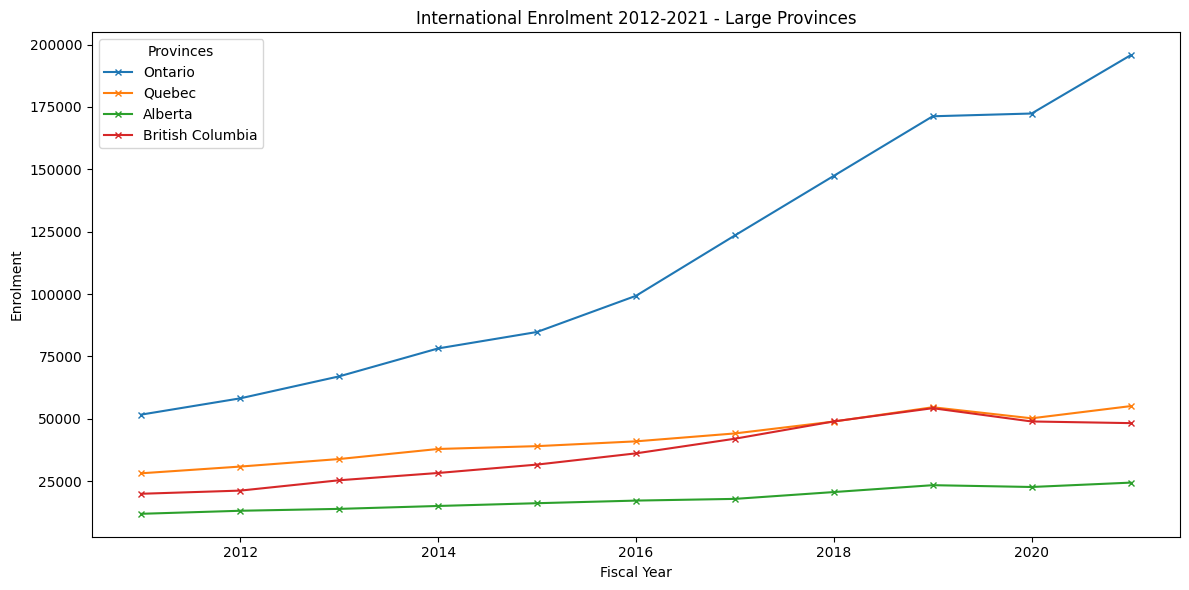

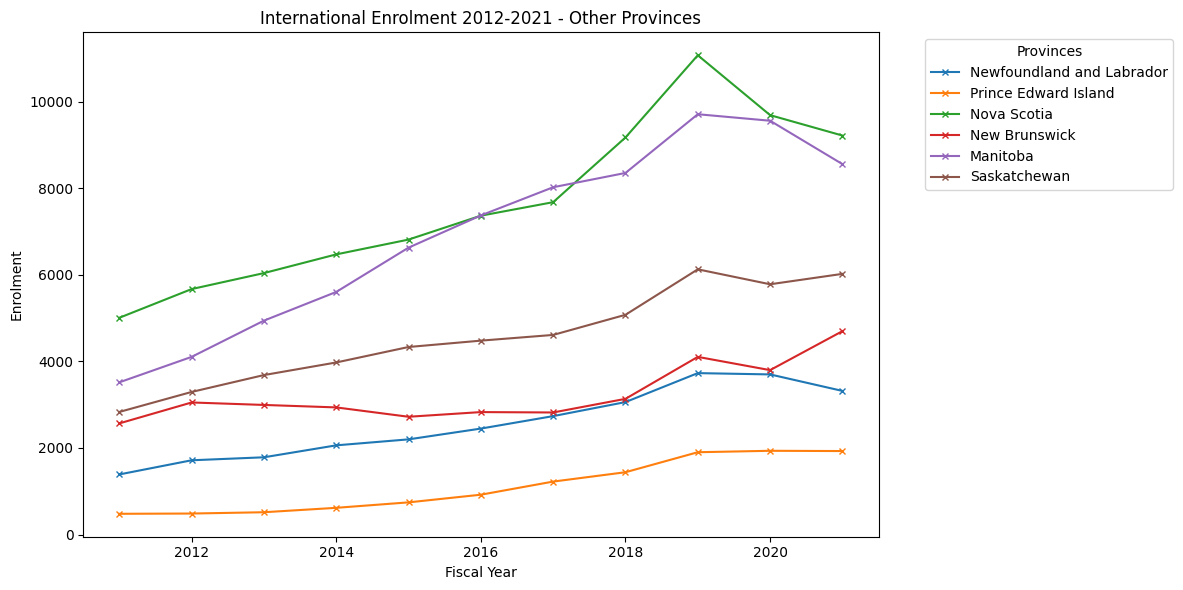

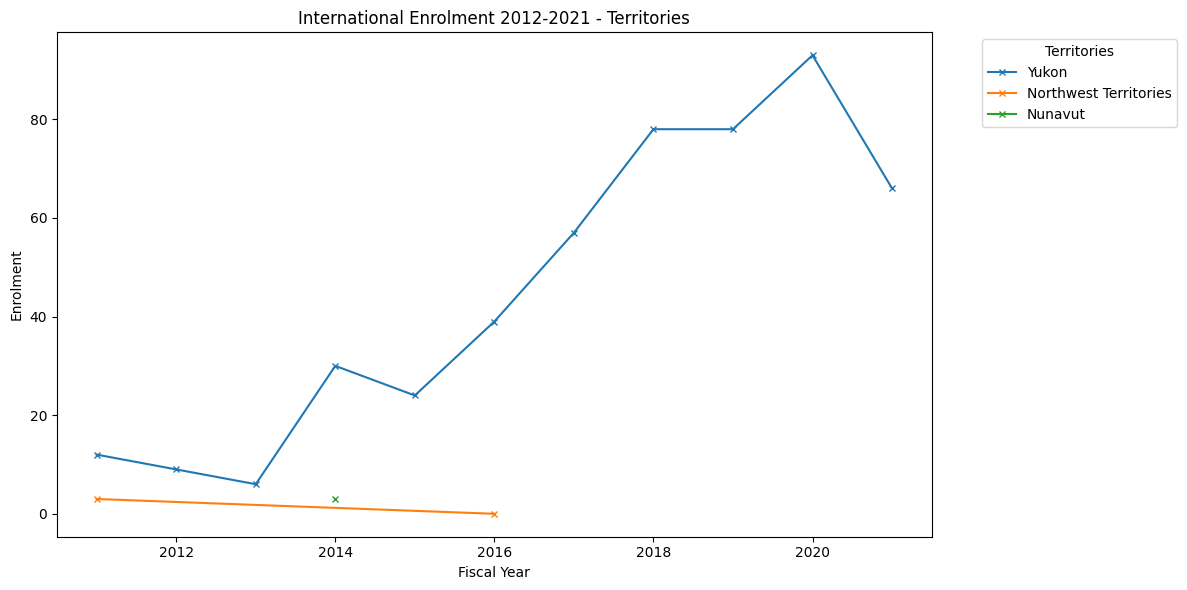

In [60]:
# Filter out rows where 'School/Locality' is "Canada"
provinces_df_intl = canada_df_intl[~canada_df_intl['School/Locality'].isin(["Canada"])]

# Define the provinces and territories for the three separate graphs
large_population_provinces = ["Ontario", "Quebec", "Alberta", "British Columbia"]
territories = ["Yukon", "Northwest Territories", "Nunavut"]
other_provinces = [
    province for province in provinces_df_intl['School/Locality'].unique()
    if province not in large_population_provinces and province not in territories
]

# Create the first graph for large population provinces
plt.figure(figsize=(12, 6))
for province in large_population_provinces:
    province_data = provinces_df_intl[provinces_df_intl['School/Locality'] == province]
    plt.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
plt.title('International Enrolment 2012-2021 - Large Provinces')
plt.xlabel('Fiscal Year')
plt.ylabel('Enrolment')
plt.legend(title='Provinces')
plt.tight_layout()
plt.show()

# Create the second graph for other provinces
plt.figure(figsize=(12, 6))
for province in other_provinces:
    province_data = provinces_df_intl[provinces_df_intl['School/Locality'] == province]
    plt.plot(
        province_data['FY Start'],
        province_data['Enrolment'],
        label=province,
        marker='x',
        markersize=4
    )
plt.title('International Enrolment 2012-2021 - Other Provinces')
plt.xlabel('Fiscal Year')
plt.ylabel('Enrolment')
plt.legend(title='Provinces', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create the third graph for territories
plt.figure(figsize=(12, 6))
for territory in territories:
    territory_data = provinces_df_intl[provinces_df_intl['School/Locality'] == territory]
    plt.plot(
        territory_data['FY Start'],
        territory_data['Enrolment'],
        label=territory,
        marker='x',
        markersize=4
    )
plt.title('International Enrolment 2012-2021 - Territories')
plt.xlabel('Fiscal Year')
plt.ylabel('Enrolment')
plt.legend(title='Territories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [62]:
# Split 'School/Locality' by ", " from the right and extract school name and province/territory
colleges_universities_df_intl[['School Name', 'Province/Territory']] = colleges_universities_df_intl['School/Locality'].str.rsplit(", ", n=1, expand=True)

# Drop the original 'School/Locality' column if no longer needed
colleges_universities_df_intl.drop(columns=['School/Locality'], inplace=True)

# Display the updated dataframe
print(colleges_universities_df_intl.head())

    FY Start Registration status                  Status  Enrolment  \
22      2011   Full-time student  International students     1341.0   
23      2012   Full-time student  International students     1650.0   
24      2013   Full-time student  International students     1725.0   
25      2014   Full-time student  International students     2019.0   
26      2015   Full-time student  International students     2148.0   

                            School Name         Province/Territory  
22  Memorial University of Newfoundland  Newfoundland and Labrador  
23  Memorial University of Newfoundland  Newfoundland and Labrador  
24  Memorial University of Newfoundland  Newfoundland and Labrador  
25  Memorial University of Newfoundland  Newfoundland and Labrador  
26  Memorial University of Newfoundland  Newfoundland and Labrador  


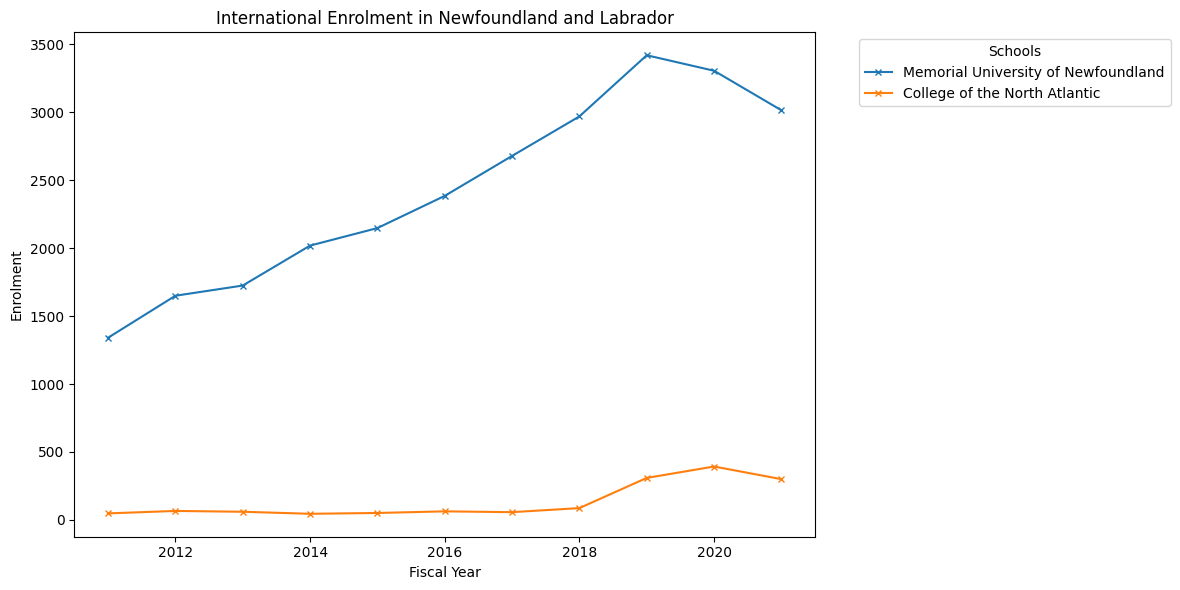

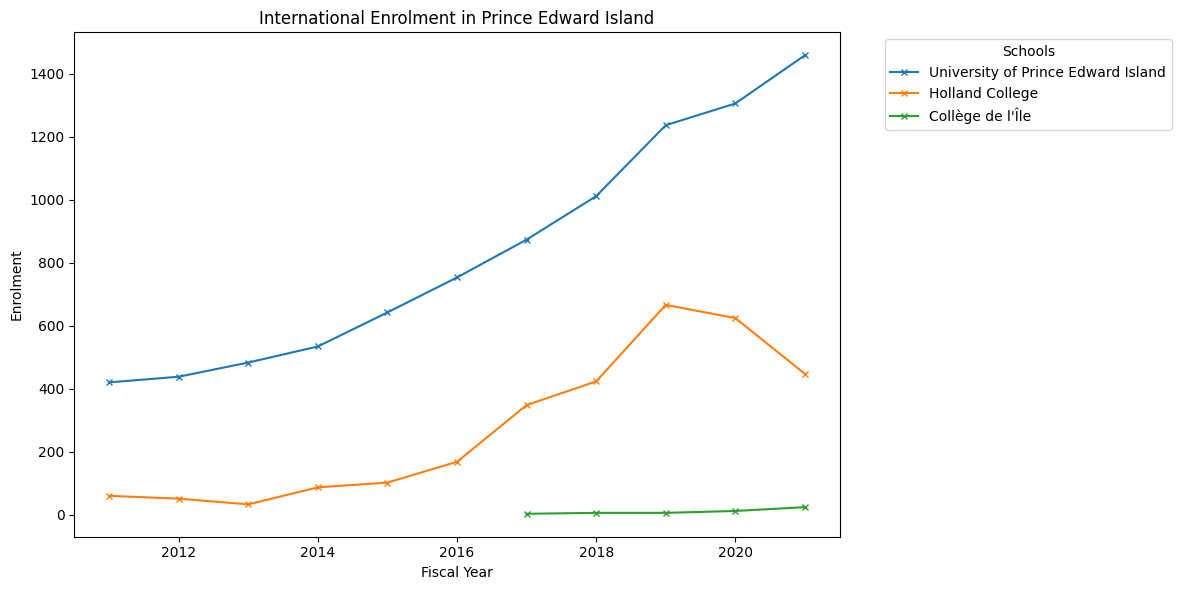

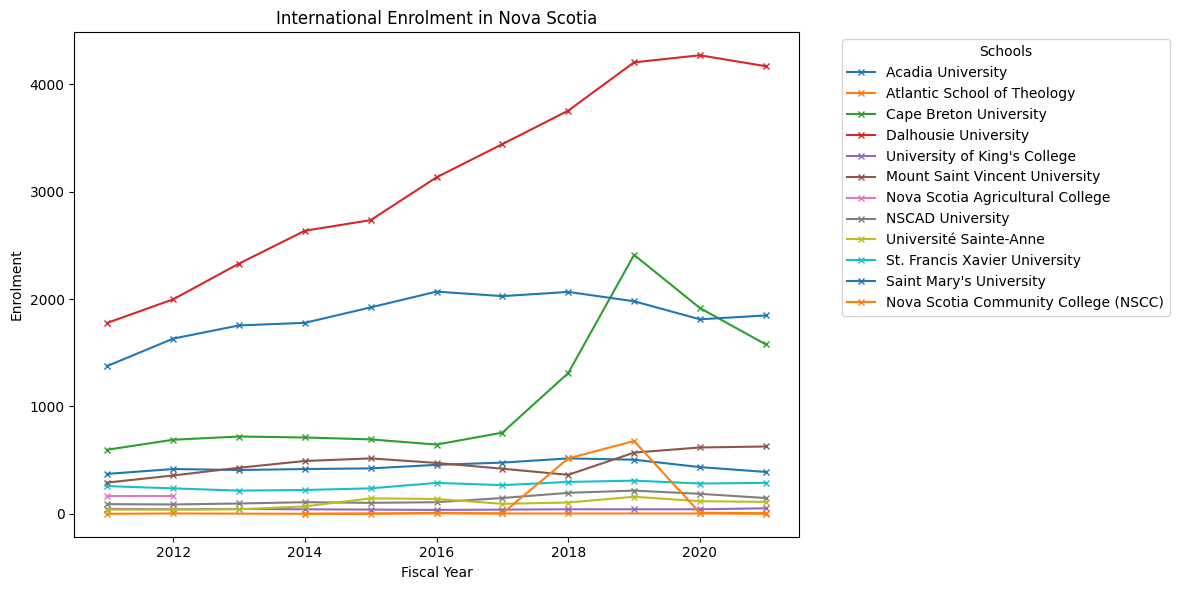

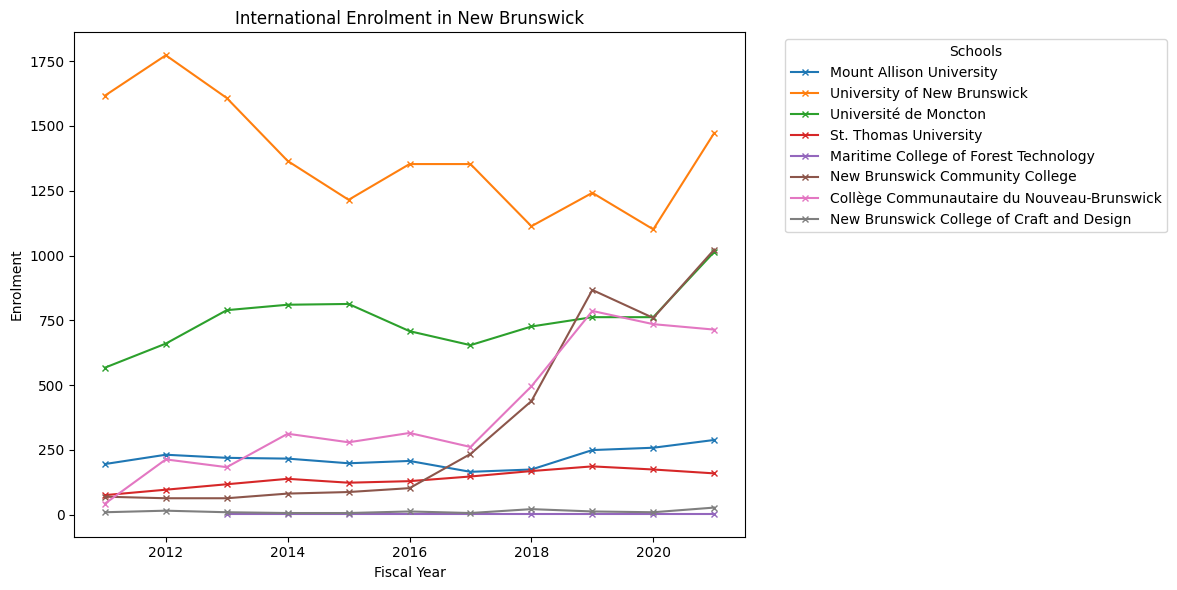

<ipython-input-66-ace1f91cb324>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


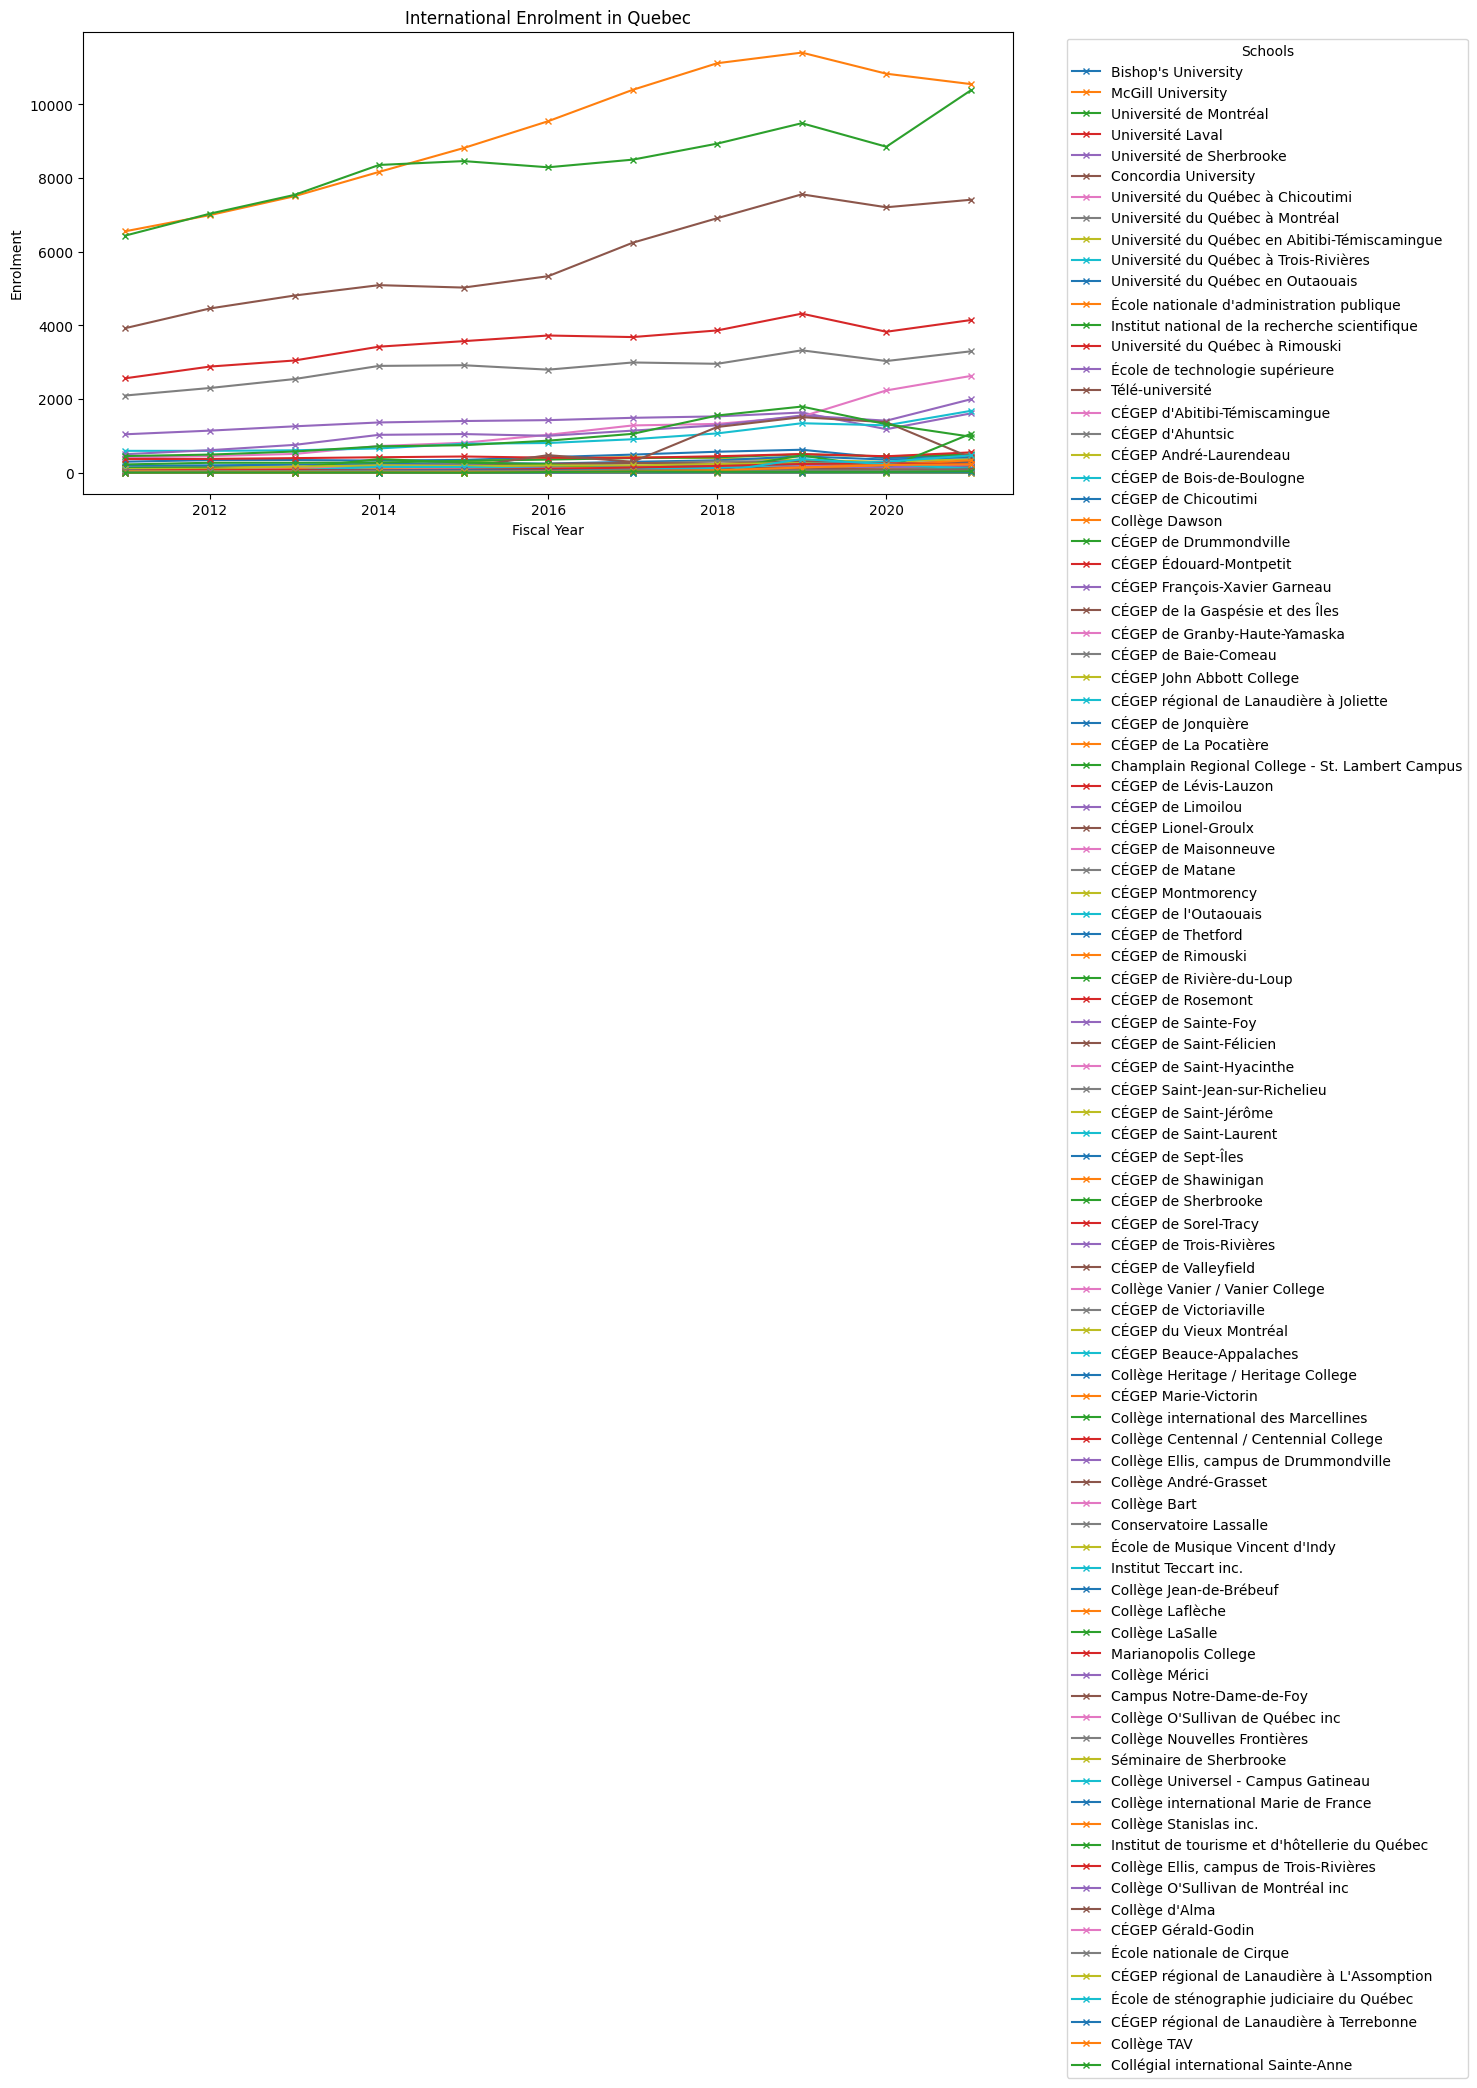

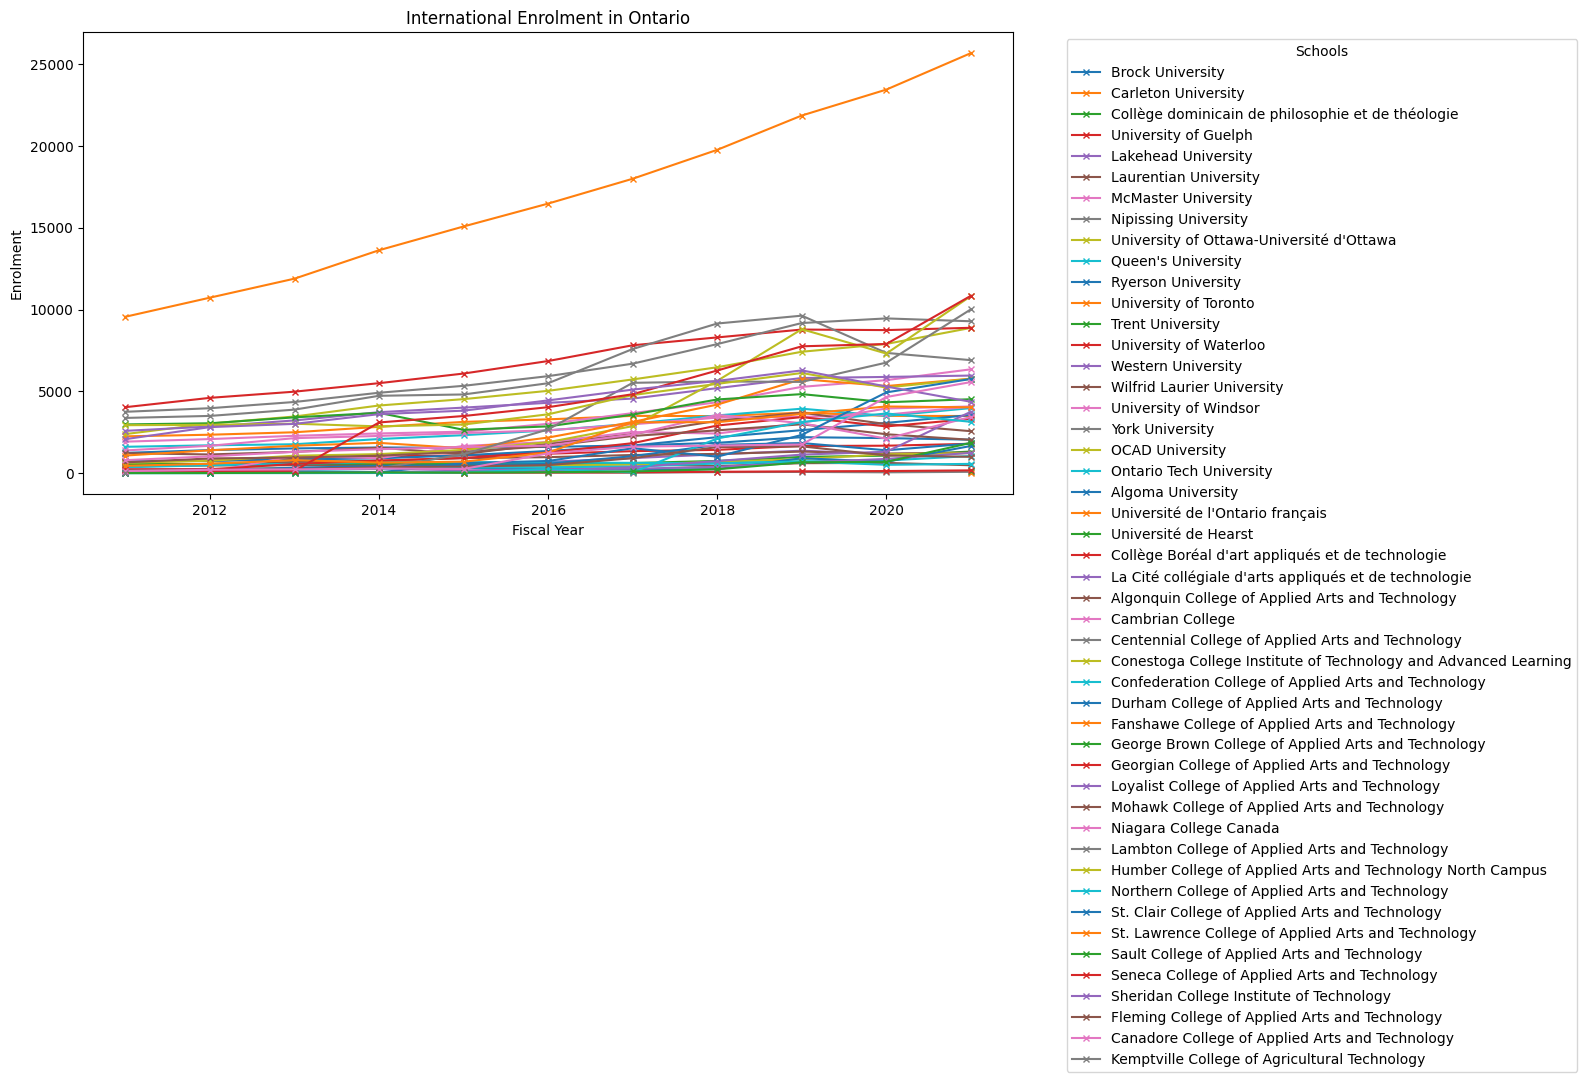

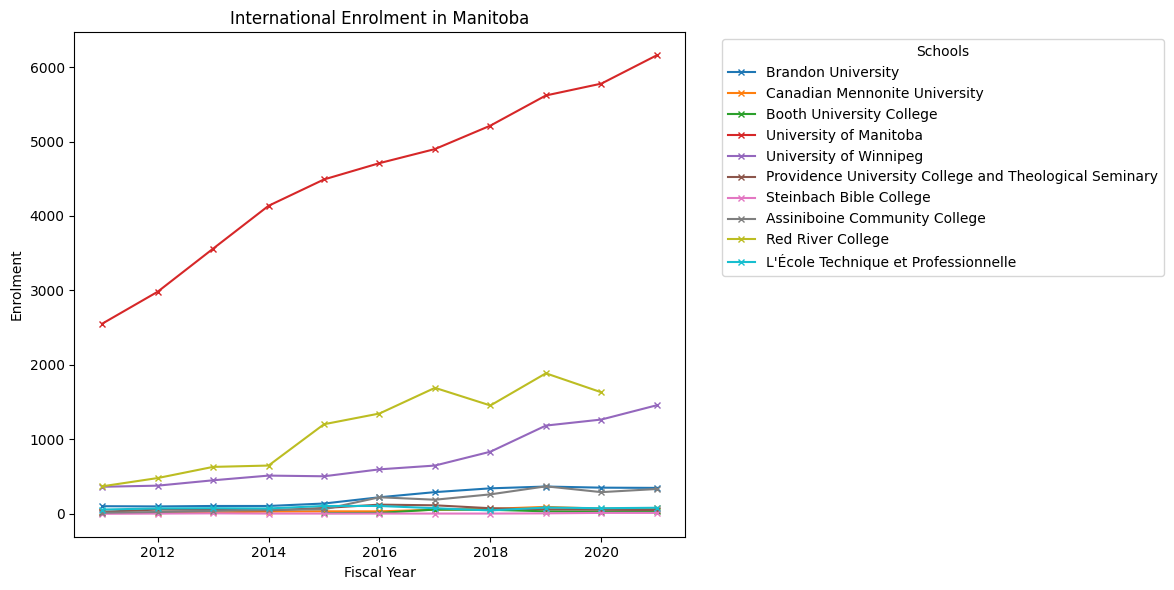

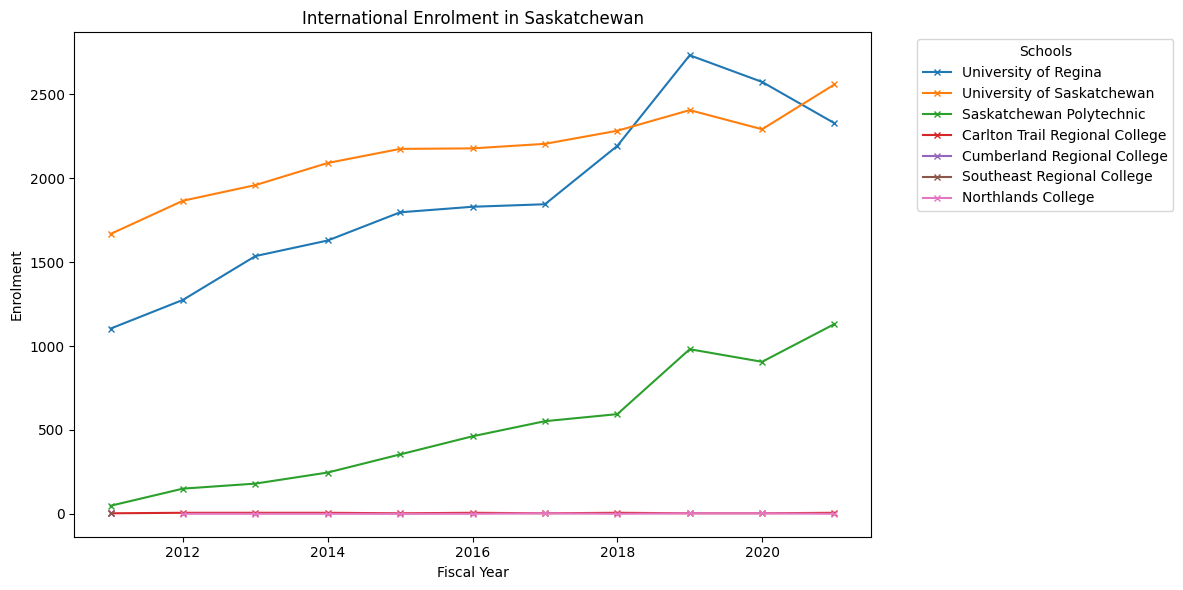

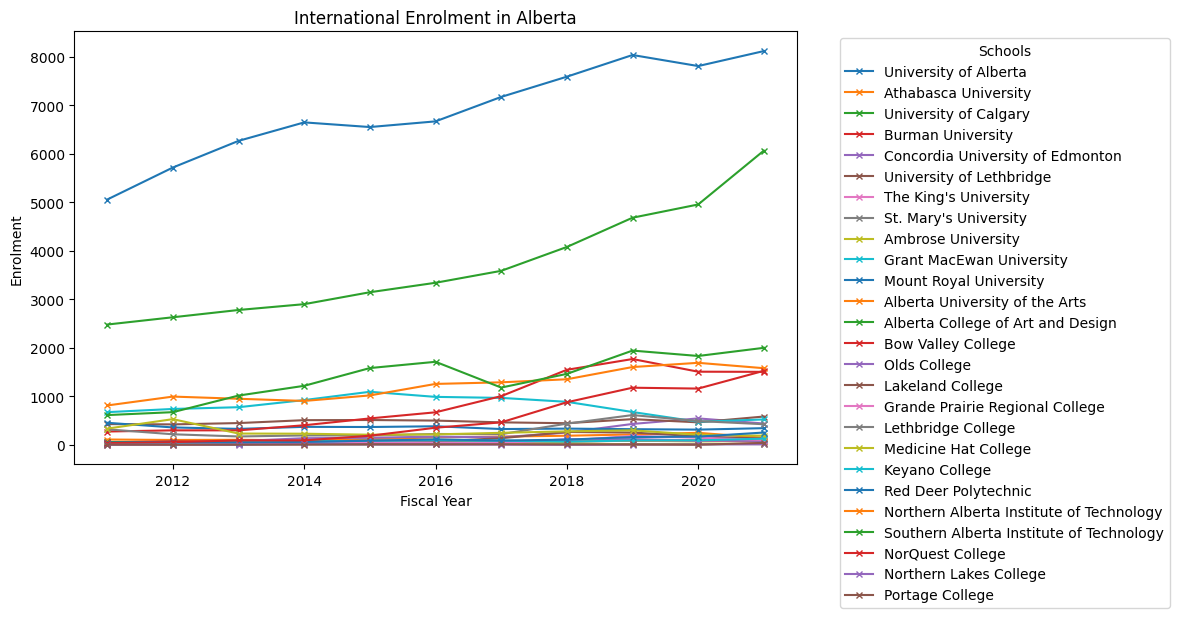

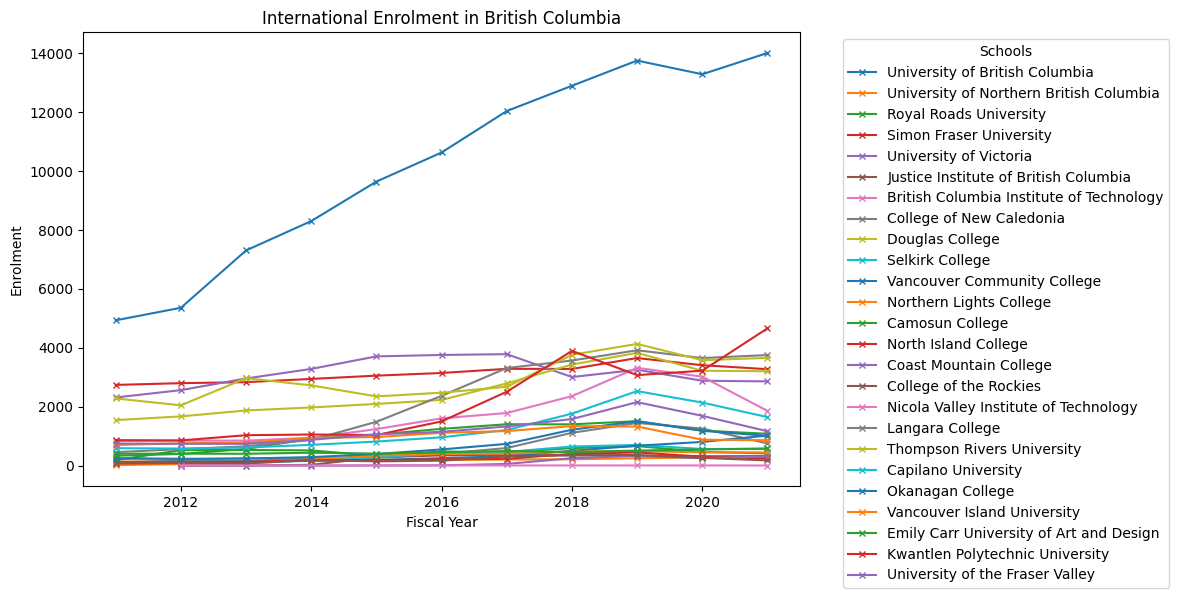

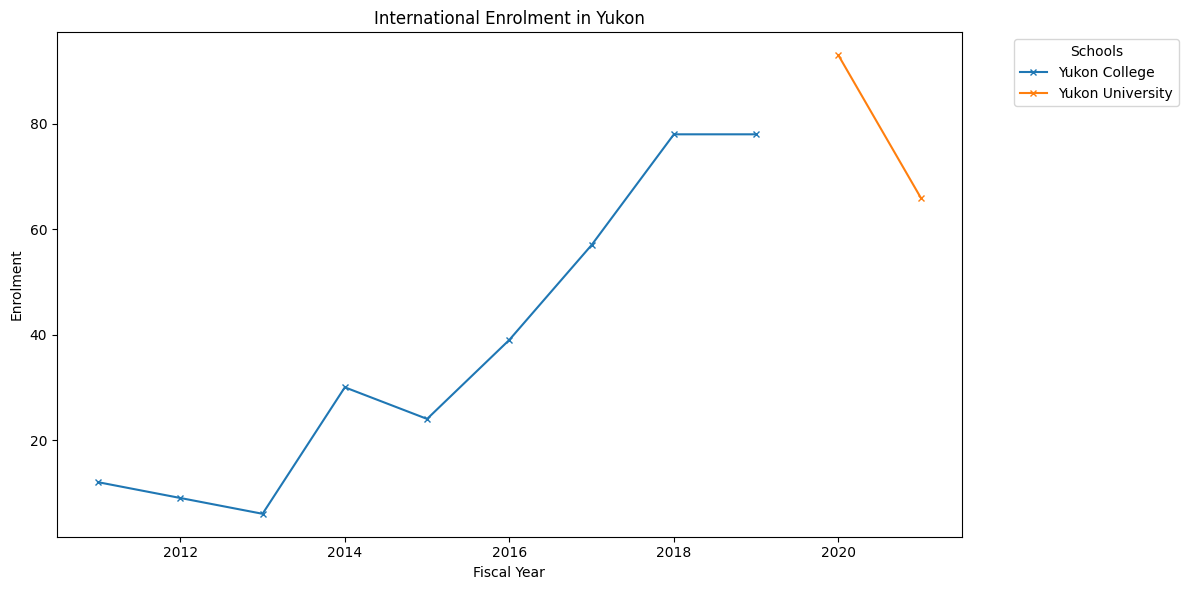

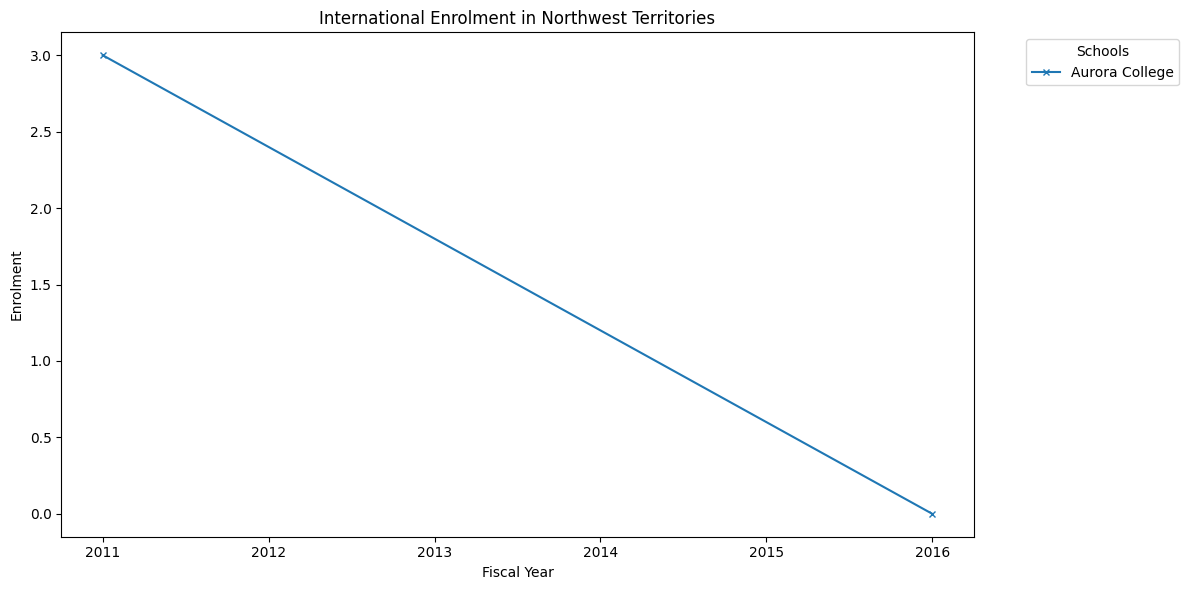

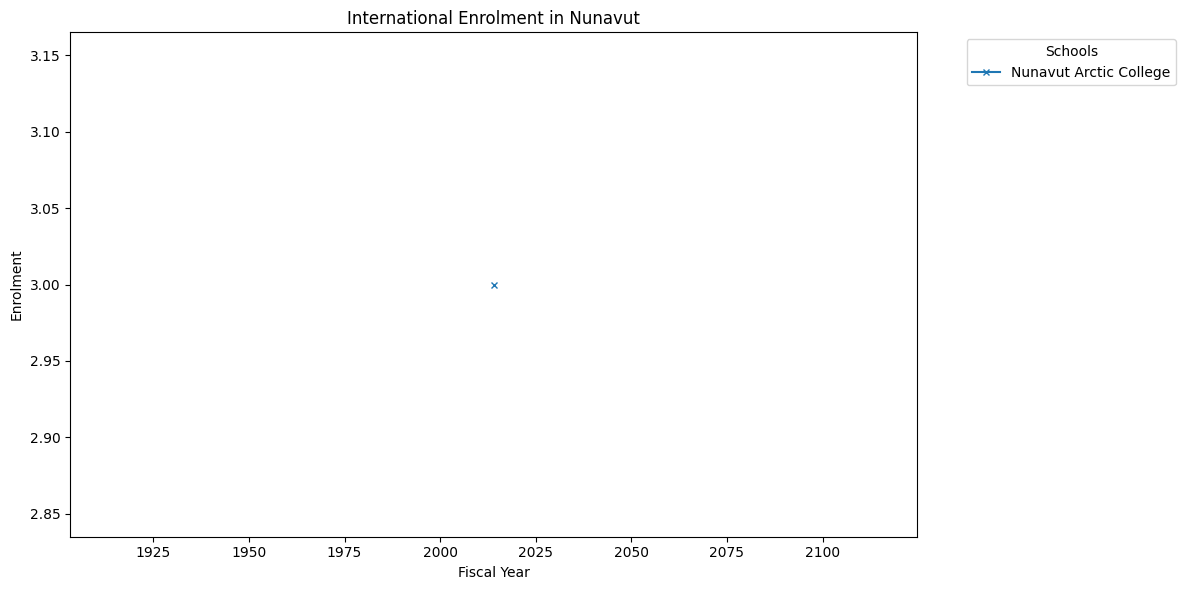

In [66]:
# Get the unique provinces/territories from the dataframe
unique_provinces_territories = colleges_universities_df_intl['Province/Territory'].unique()

# Iterate over each province/territory to create separate graphs
for province in unique_provinces_territories:
    # Filter the data for the current province/territory
    province_data = colleges_universities_df_intl[colleges_universities_df_intl['Province/Territory'] == province]

    # Create a new figure for the province
    plt.figure(figsize=(12, 6))

    # Plot enrolment trends for each school in the current province/territory
    for school in province_data['School Name'].unique():
        school_data = province_data[province_data['School Name'] == school]
        plt.plot(
            school_data['FY Start'],
            school_data['Enrolment'],
            label=school,
            marker='x',
            markersize=4
        )

    # Set the title and labels
    plt.title(f'International Enrolment in {province}')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Enrolment')

    # Display legend and layout
    plt.legend(title='Schools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()